<a href="https://colab.research.google.com/github/JerryAnggara/Skripsi_Perhitungan_Suara_CV/blob/main/Model%20Training/Image%20Segmentation/Yolov11Seg_Image_Segmentation_100epc_Augmentasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Skripsi: Model Training YoloV11seg - 100epc** </br>
Source Dataset: https://app.roboflow.com/skripsi-2025-dnrgq/anotasisegmentasi-cgr3u/2

In [ ]:
!nvidia-smi

Mon Jun  9 06:48:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.8/112.6 GB disk)


In [ ]:
import os
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7e1kBC6srdwaqLDGRSP4")
project = rf.workspace("skripsi-2025-dnrgq").project("anotasisegmentasi-cgr3u")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!yolo task=detect mode=train model=yolo11s-seg.pt data=/content/AnotasiSegmentasi-2/data.yaml epochs=100 imgsz=640 batch=32

100% 19.7M/19.7M [00:00<00:00, 292MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/AnotasiSegmentasi-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-seg.pt, momentum=

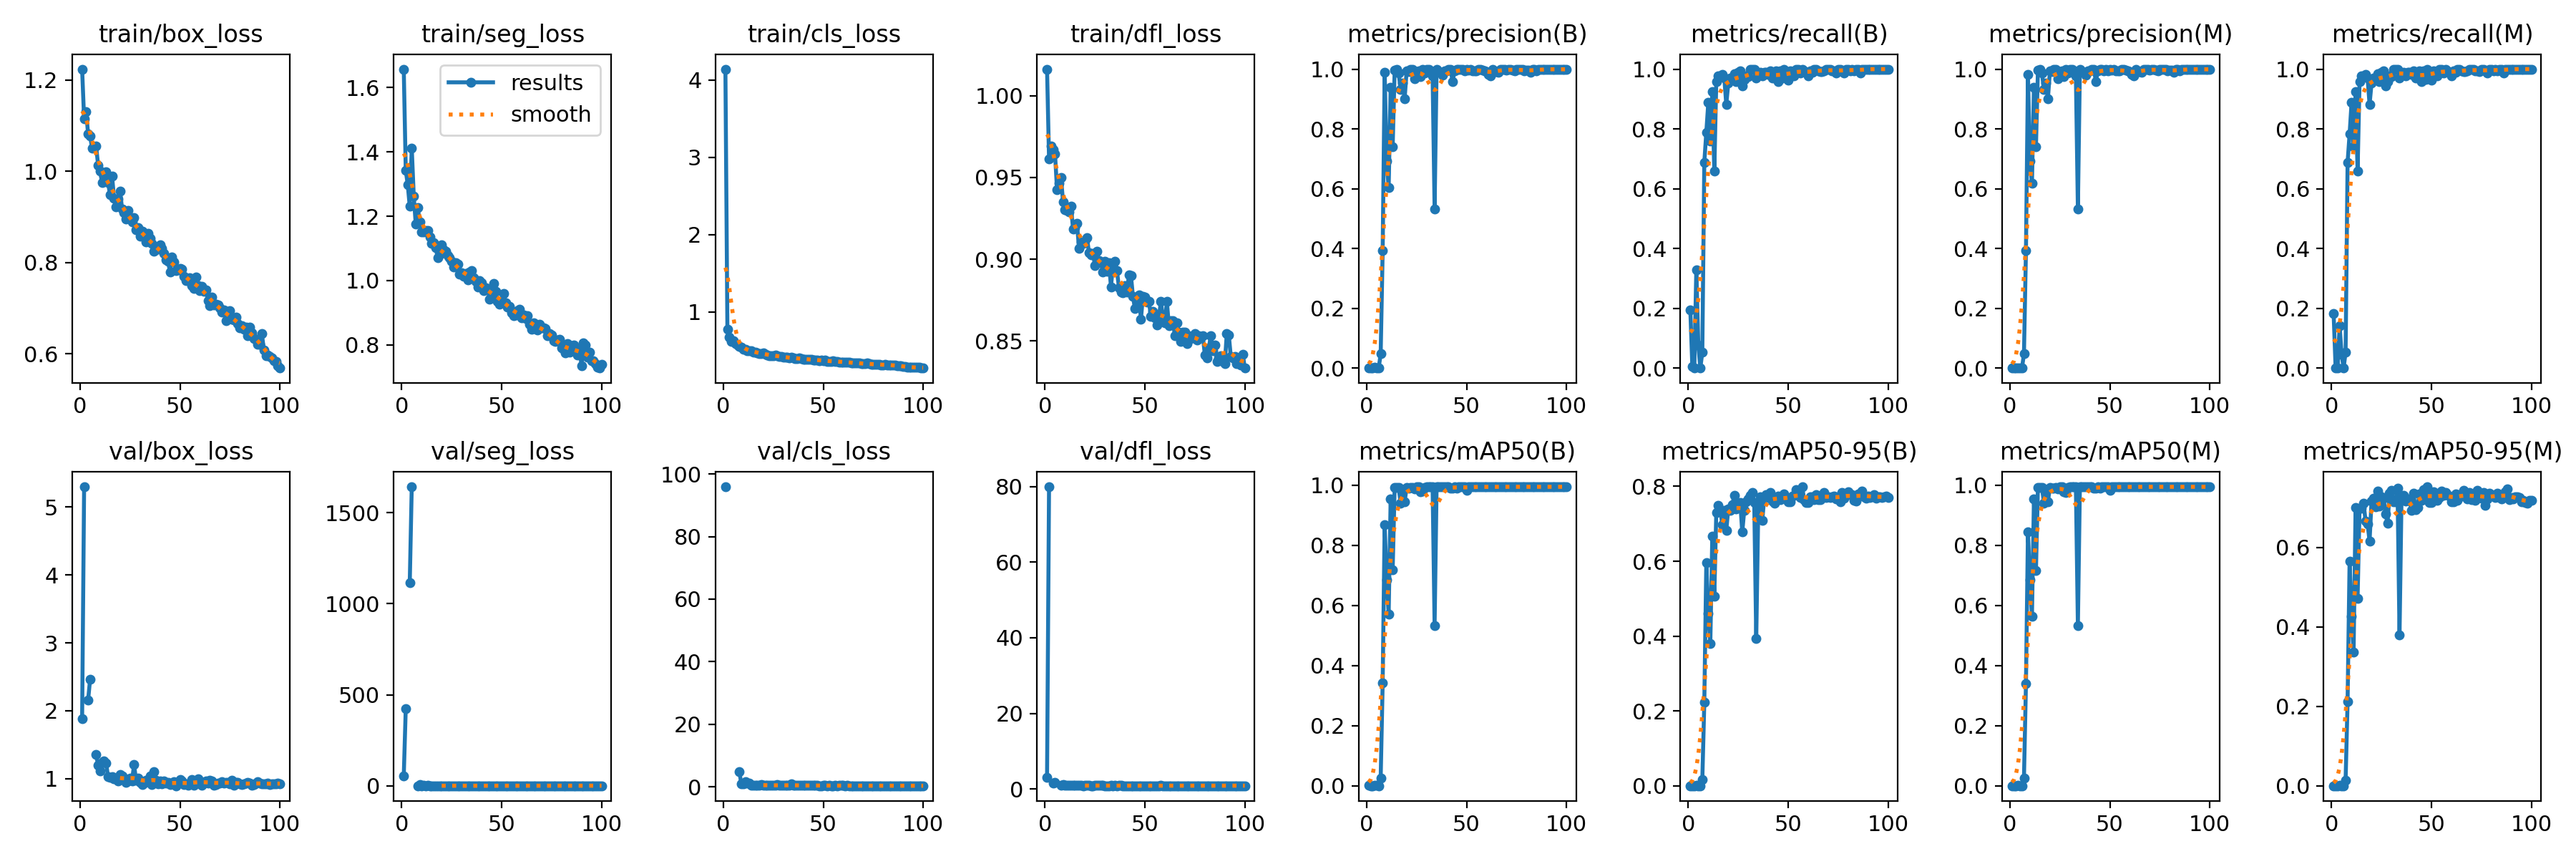

In [ ]:
Image(filename=f'/content/runs/segment/train/results.png', width=800)

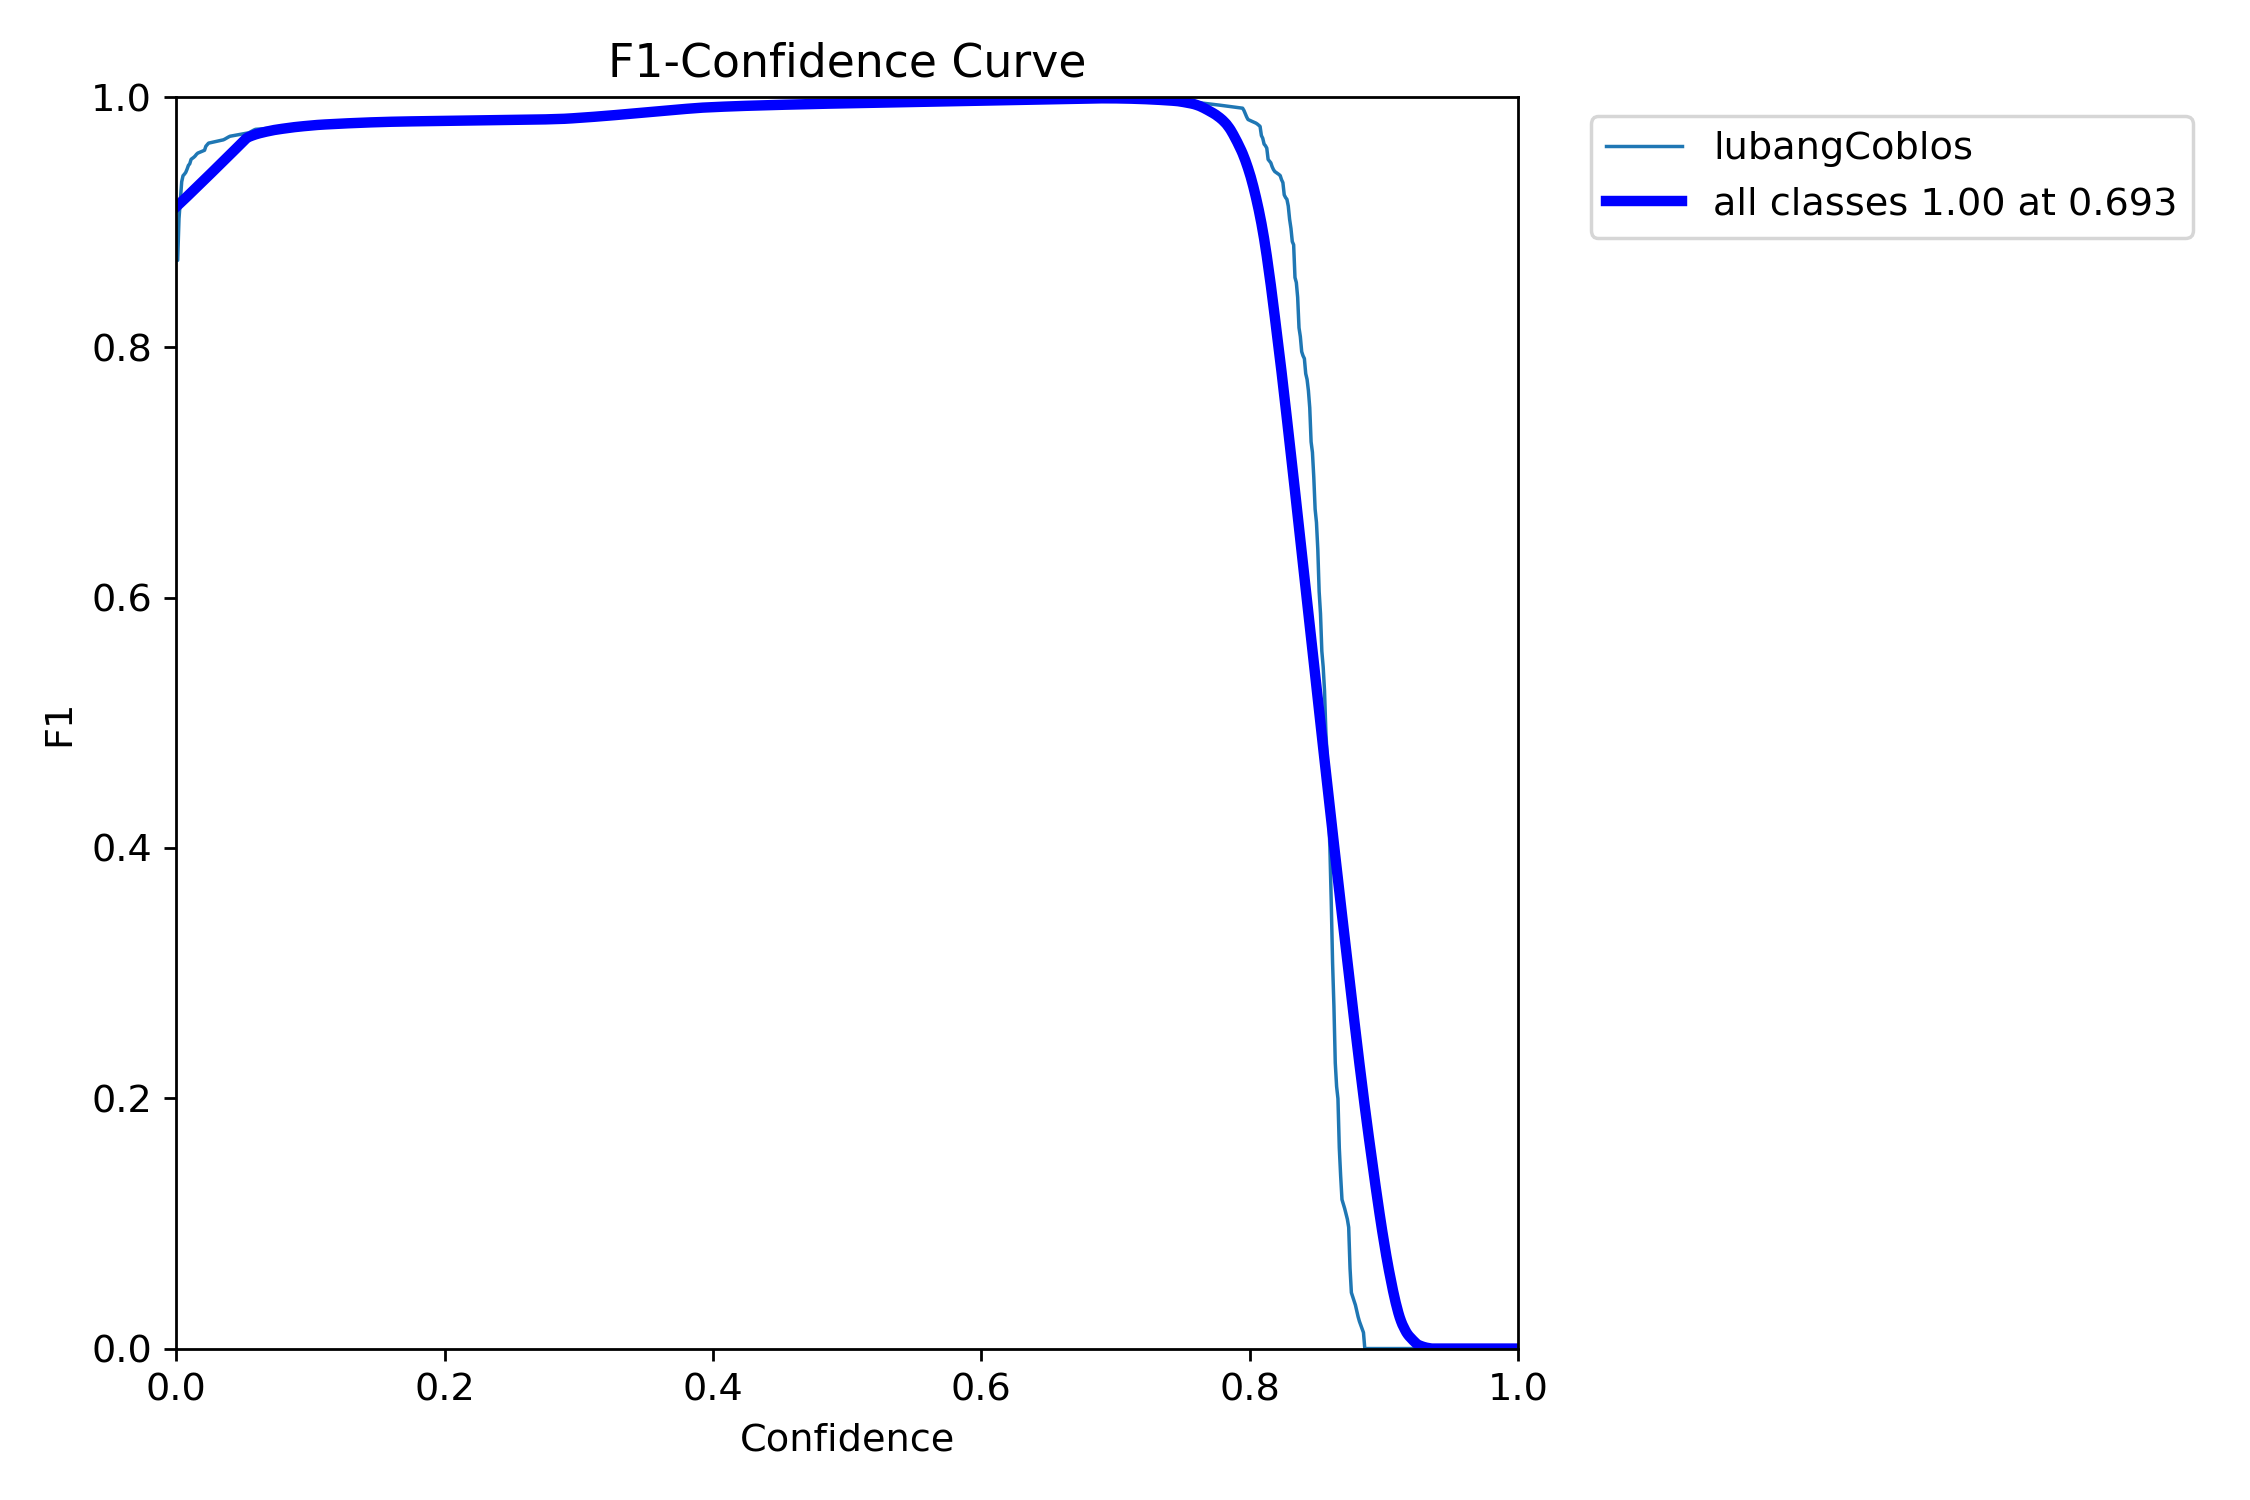

In [ ]:
Image(filename=f'/content/runs/segment/train/BoxF1_curve.png', width=800)

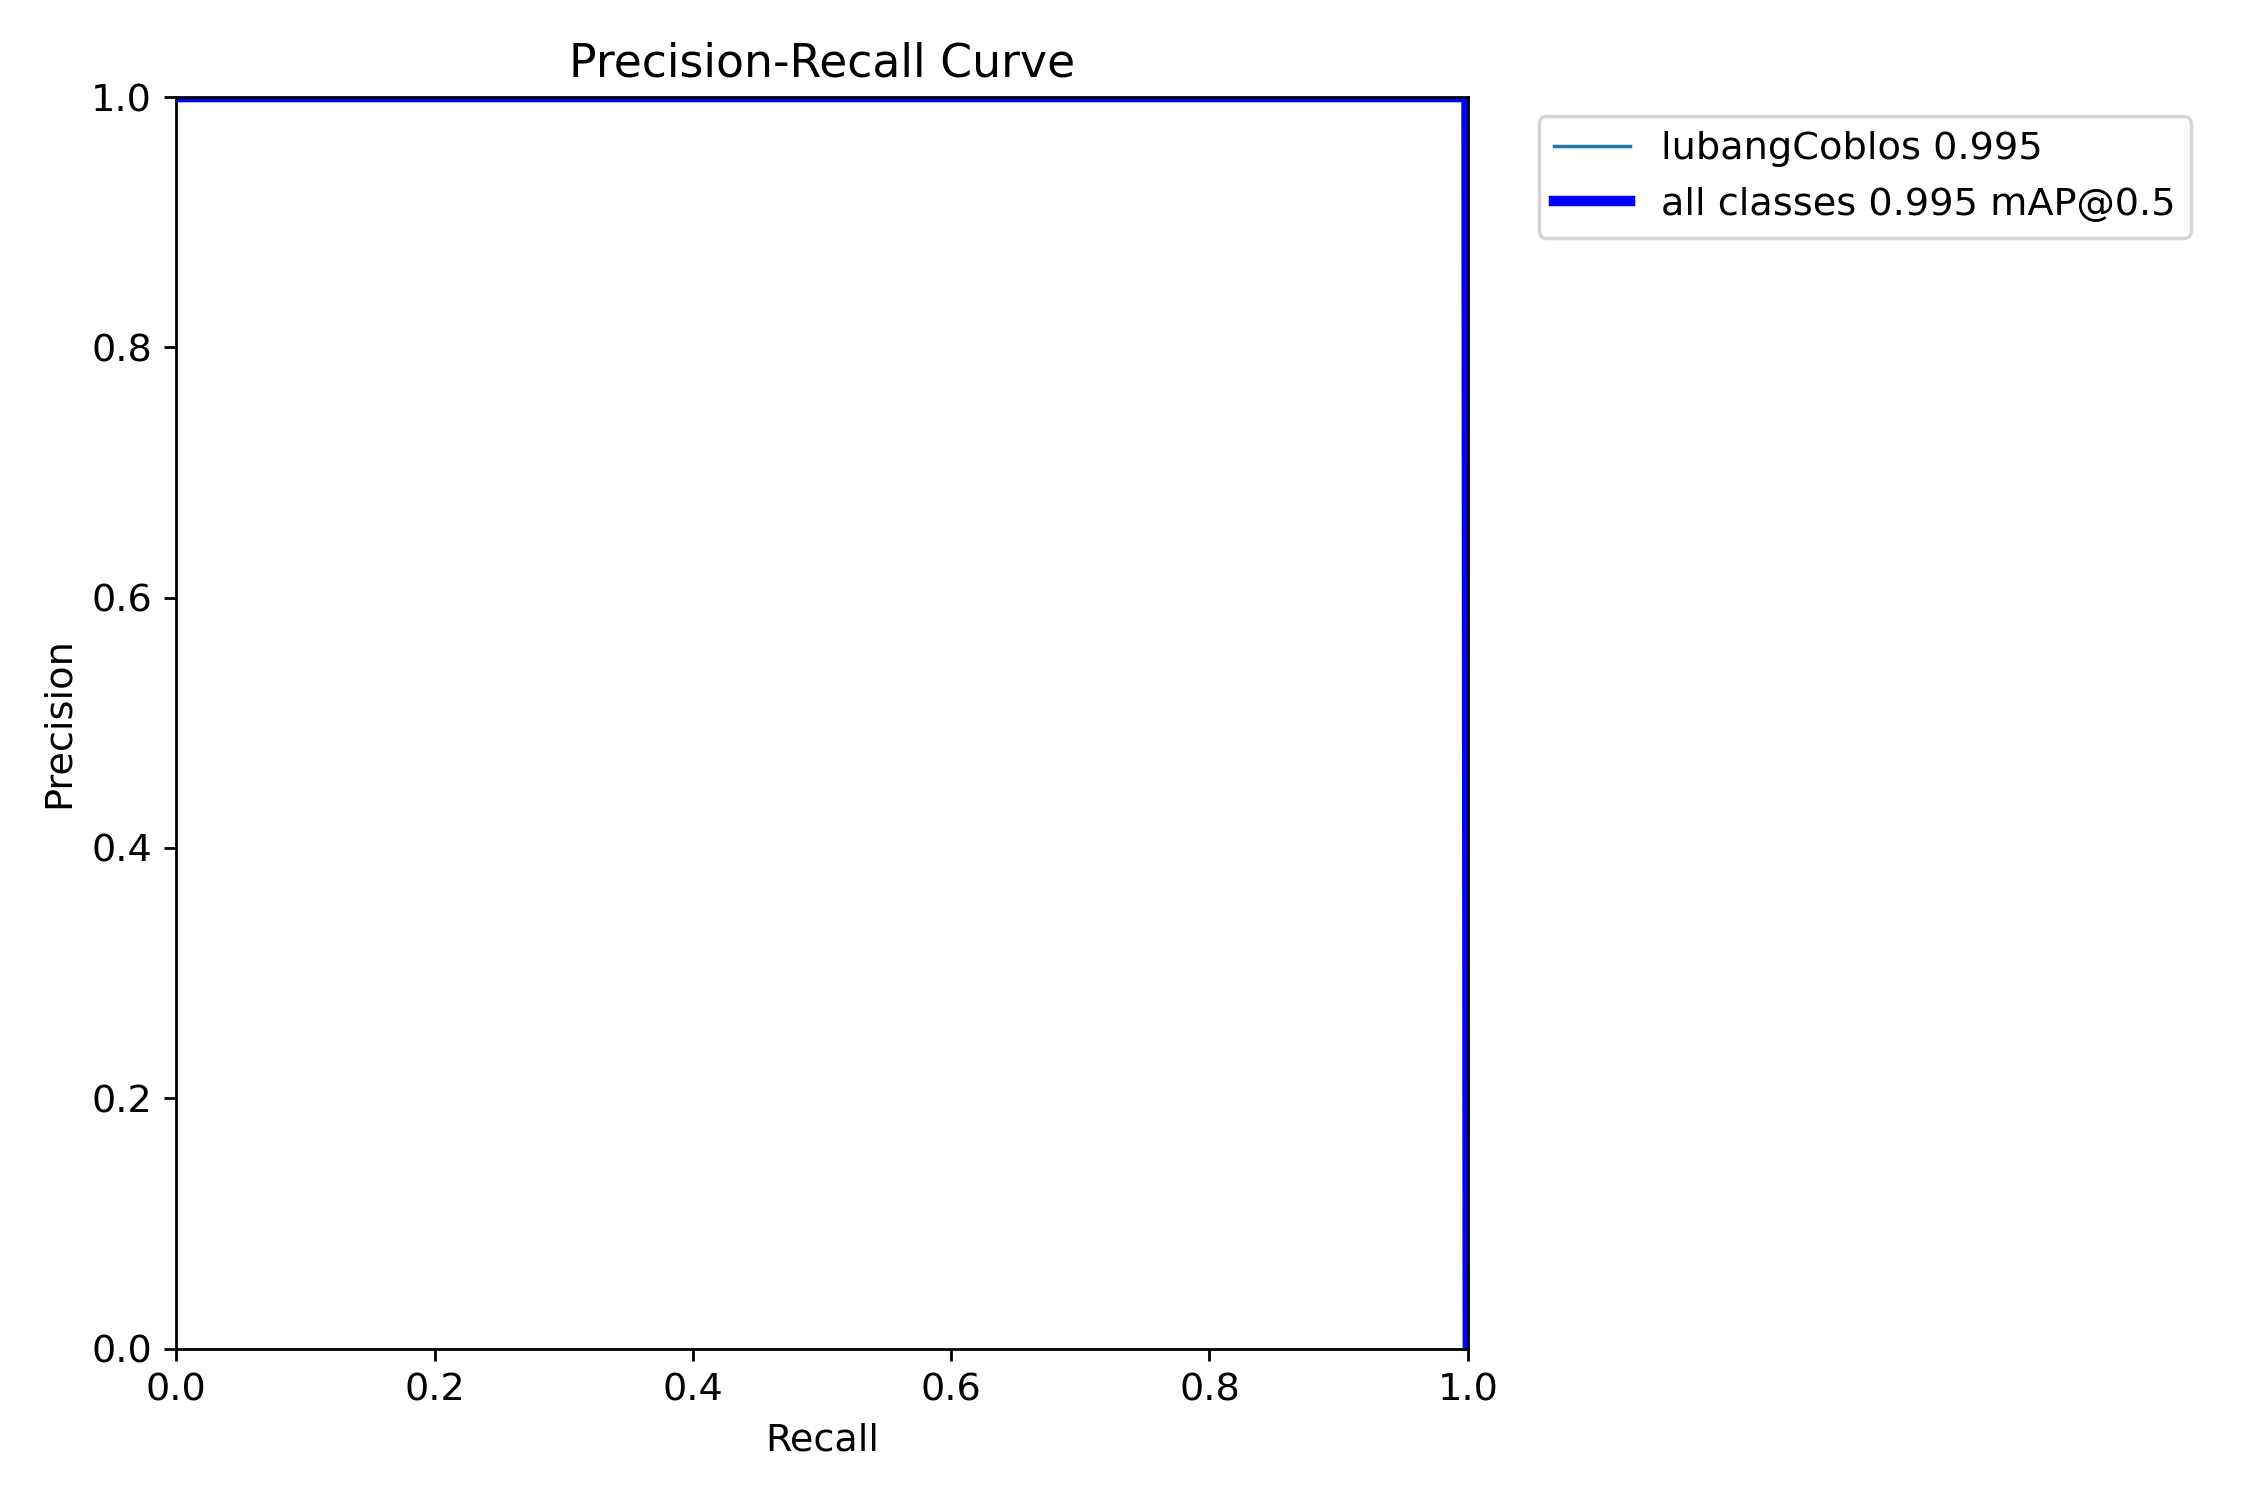

In [ ]:
Image(filename=f'/content/runs/segment/train/BoxPR_curve.png', width=800)

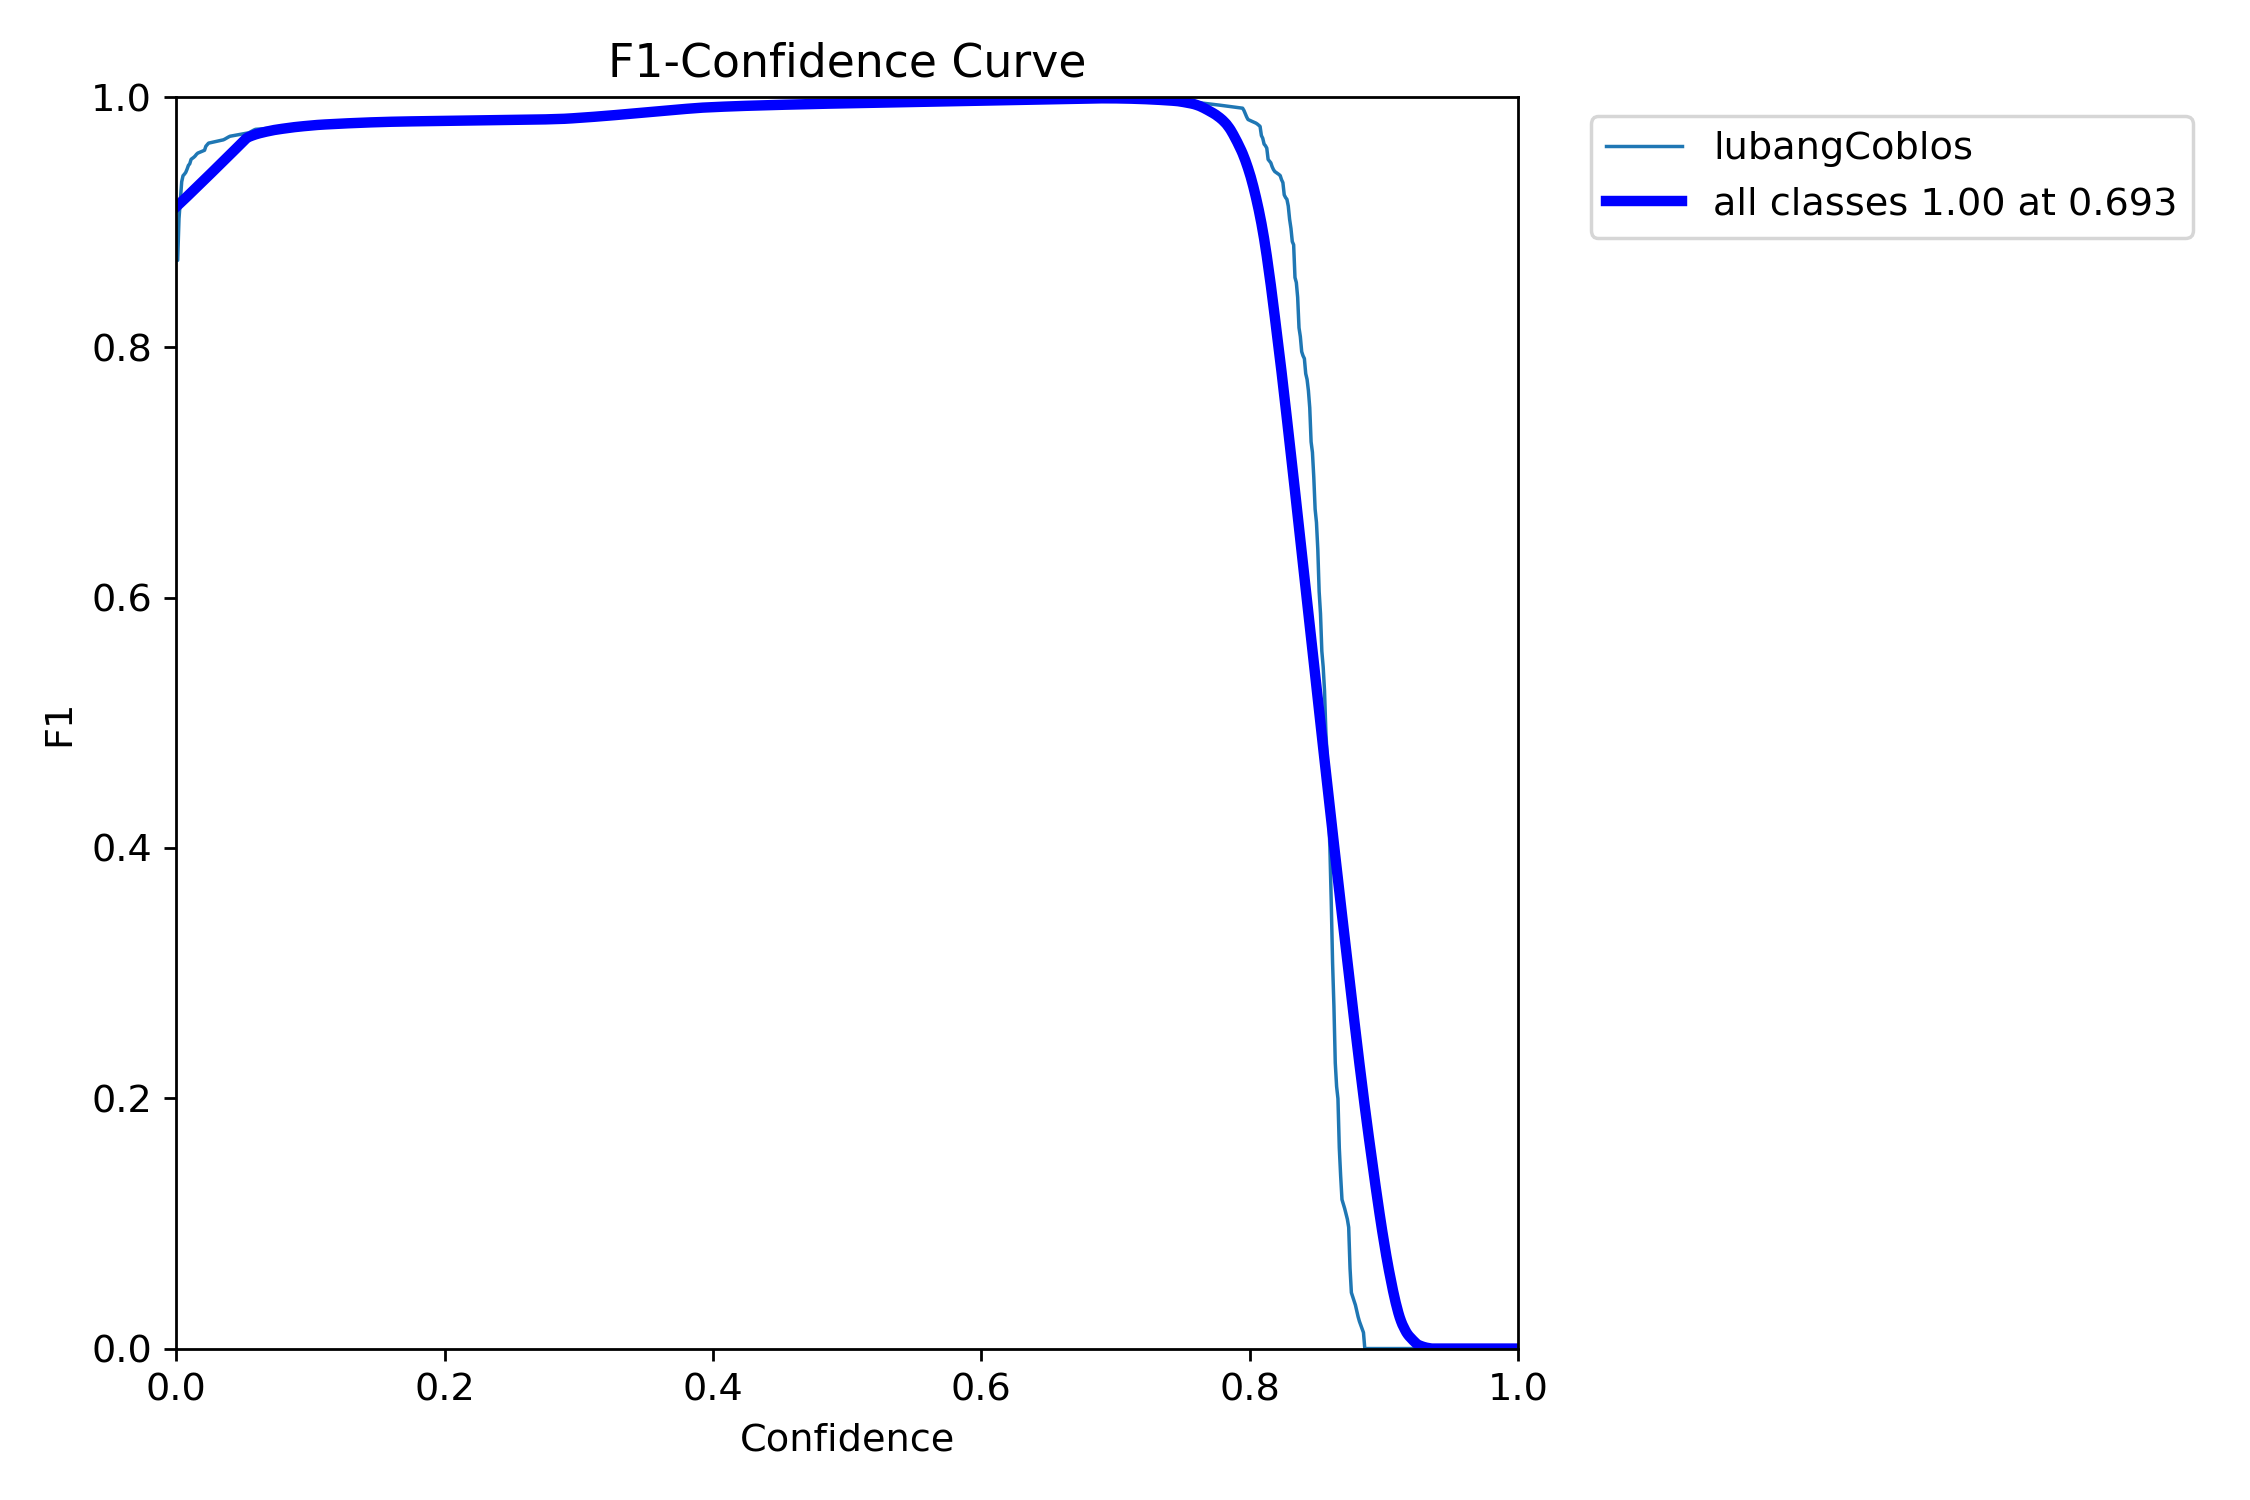

In [ ]:
Image(filename=f'/content/runs/segment/train/MaskF1_curve.png', width=800)

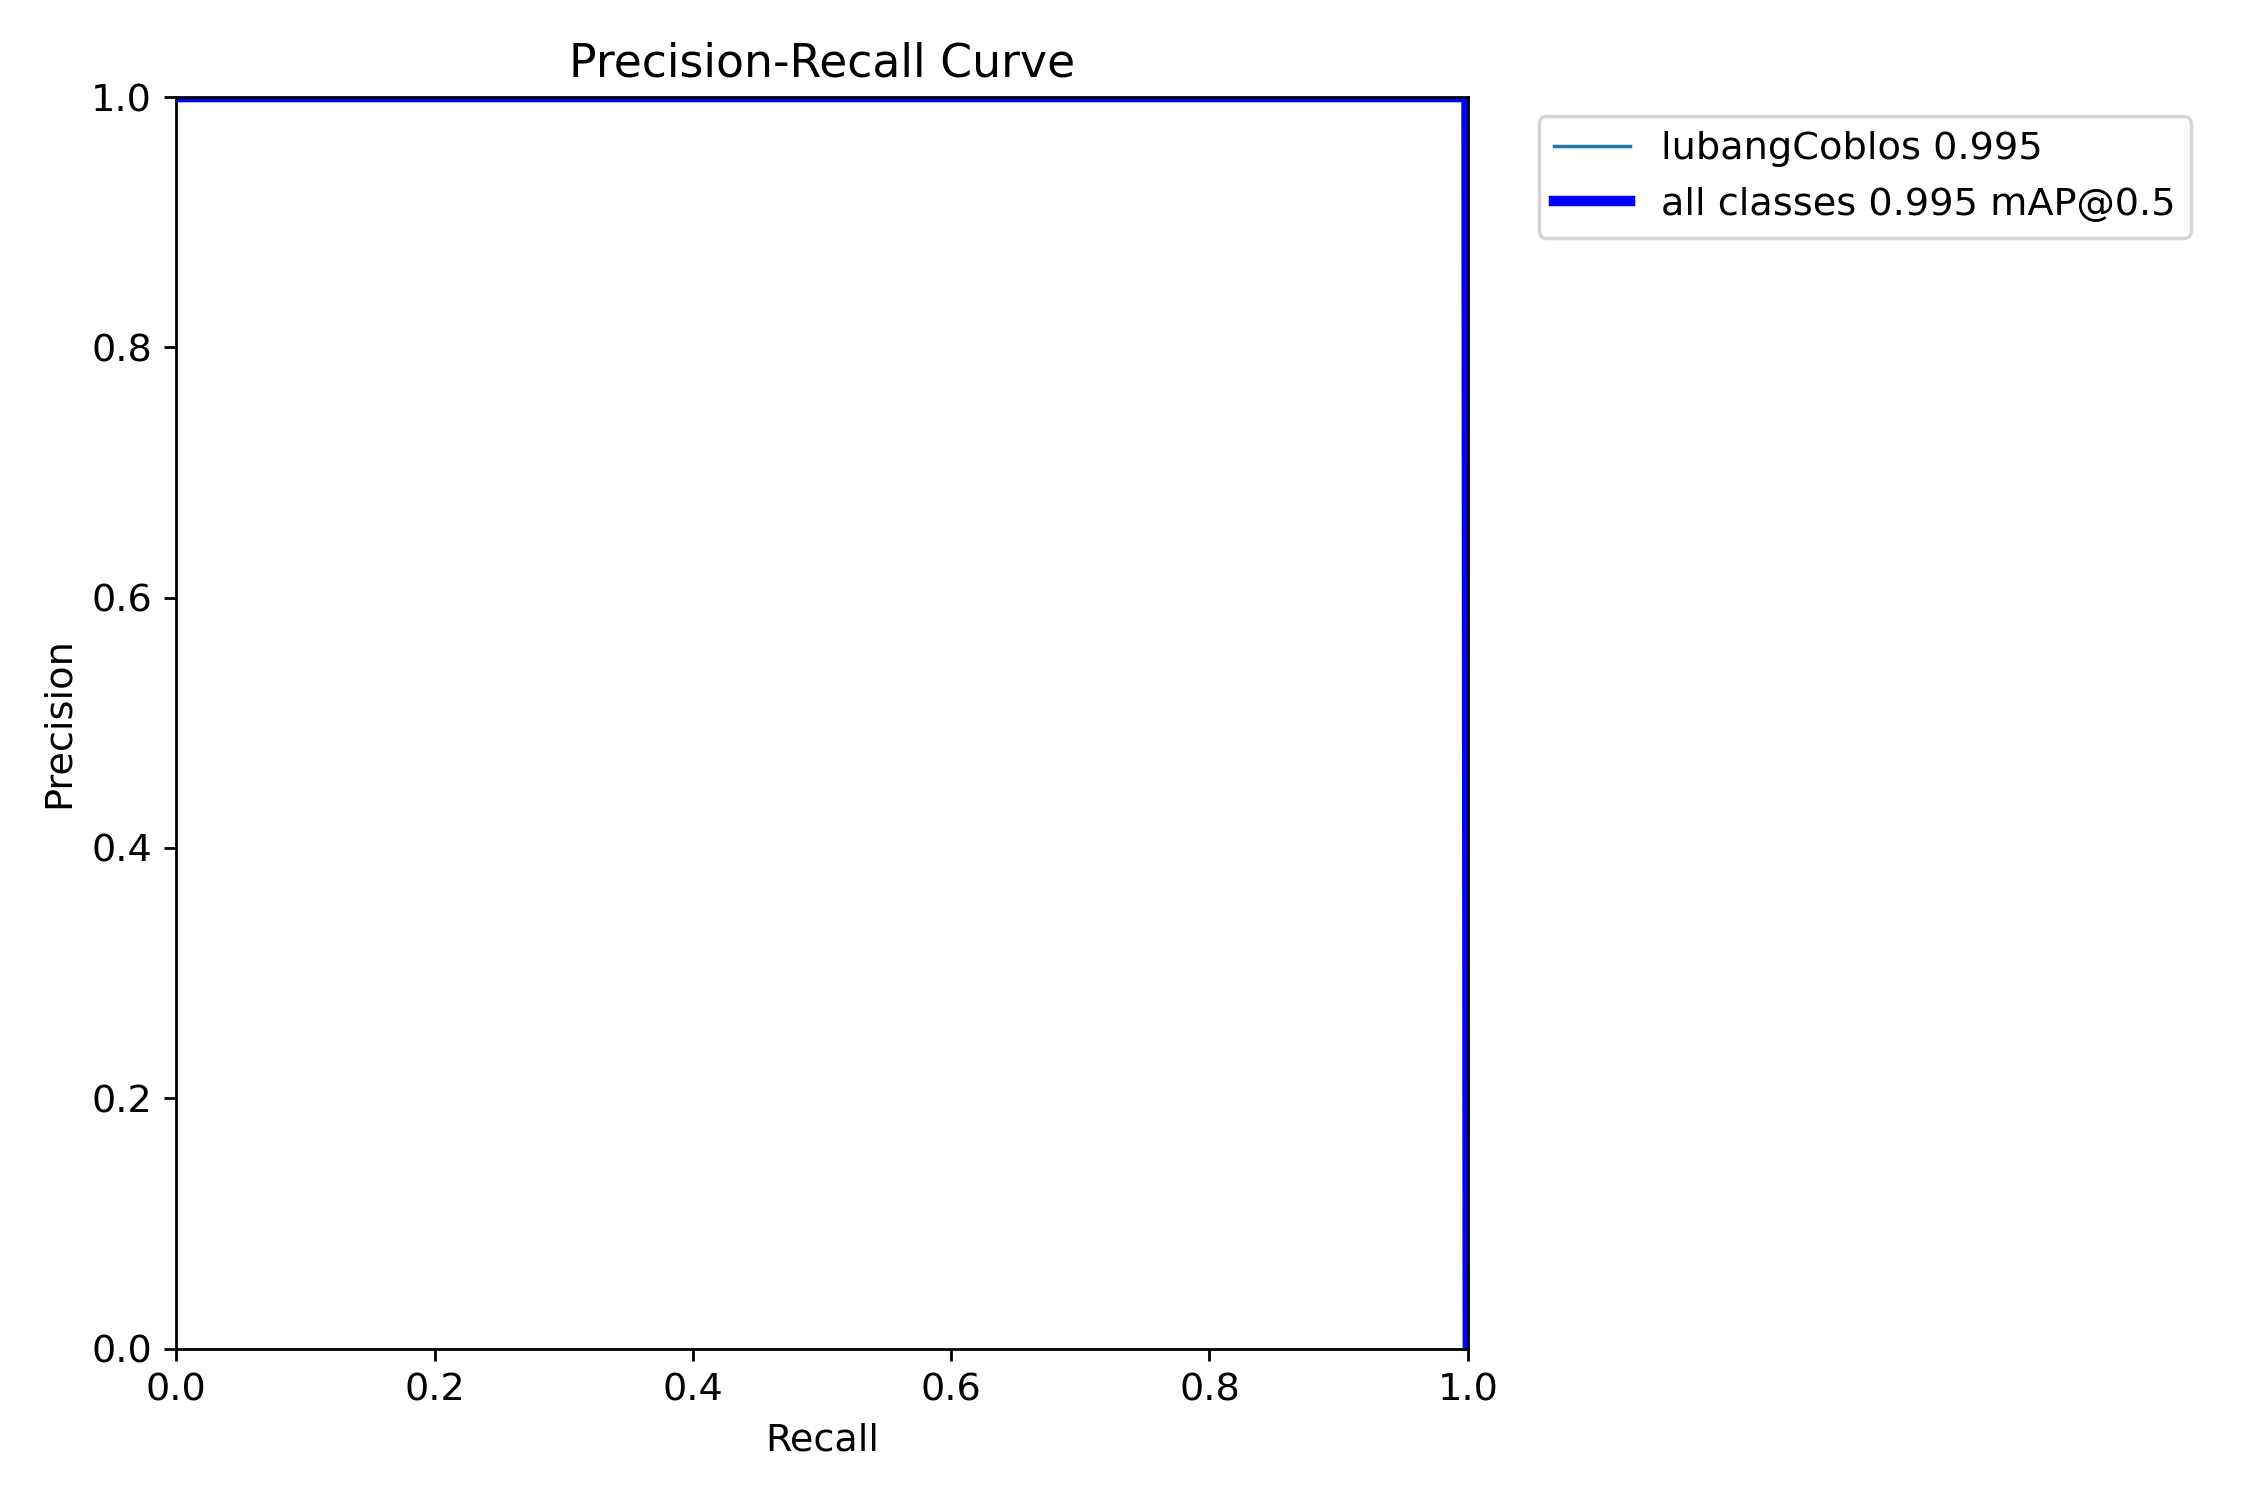

In [ ]:
Image(filename=f'/content/runs/segment/train/MaskPR_curve.png', width=800)

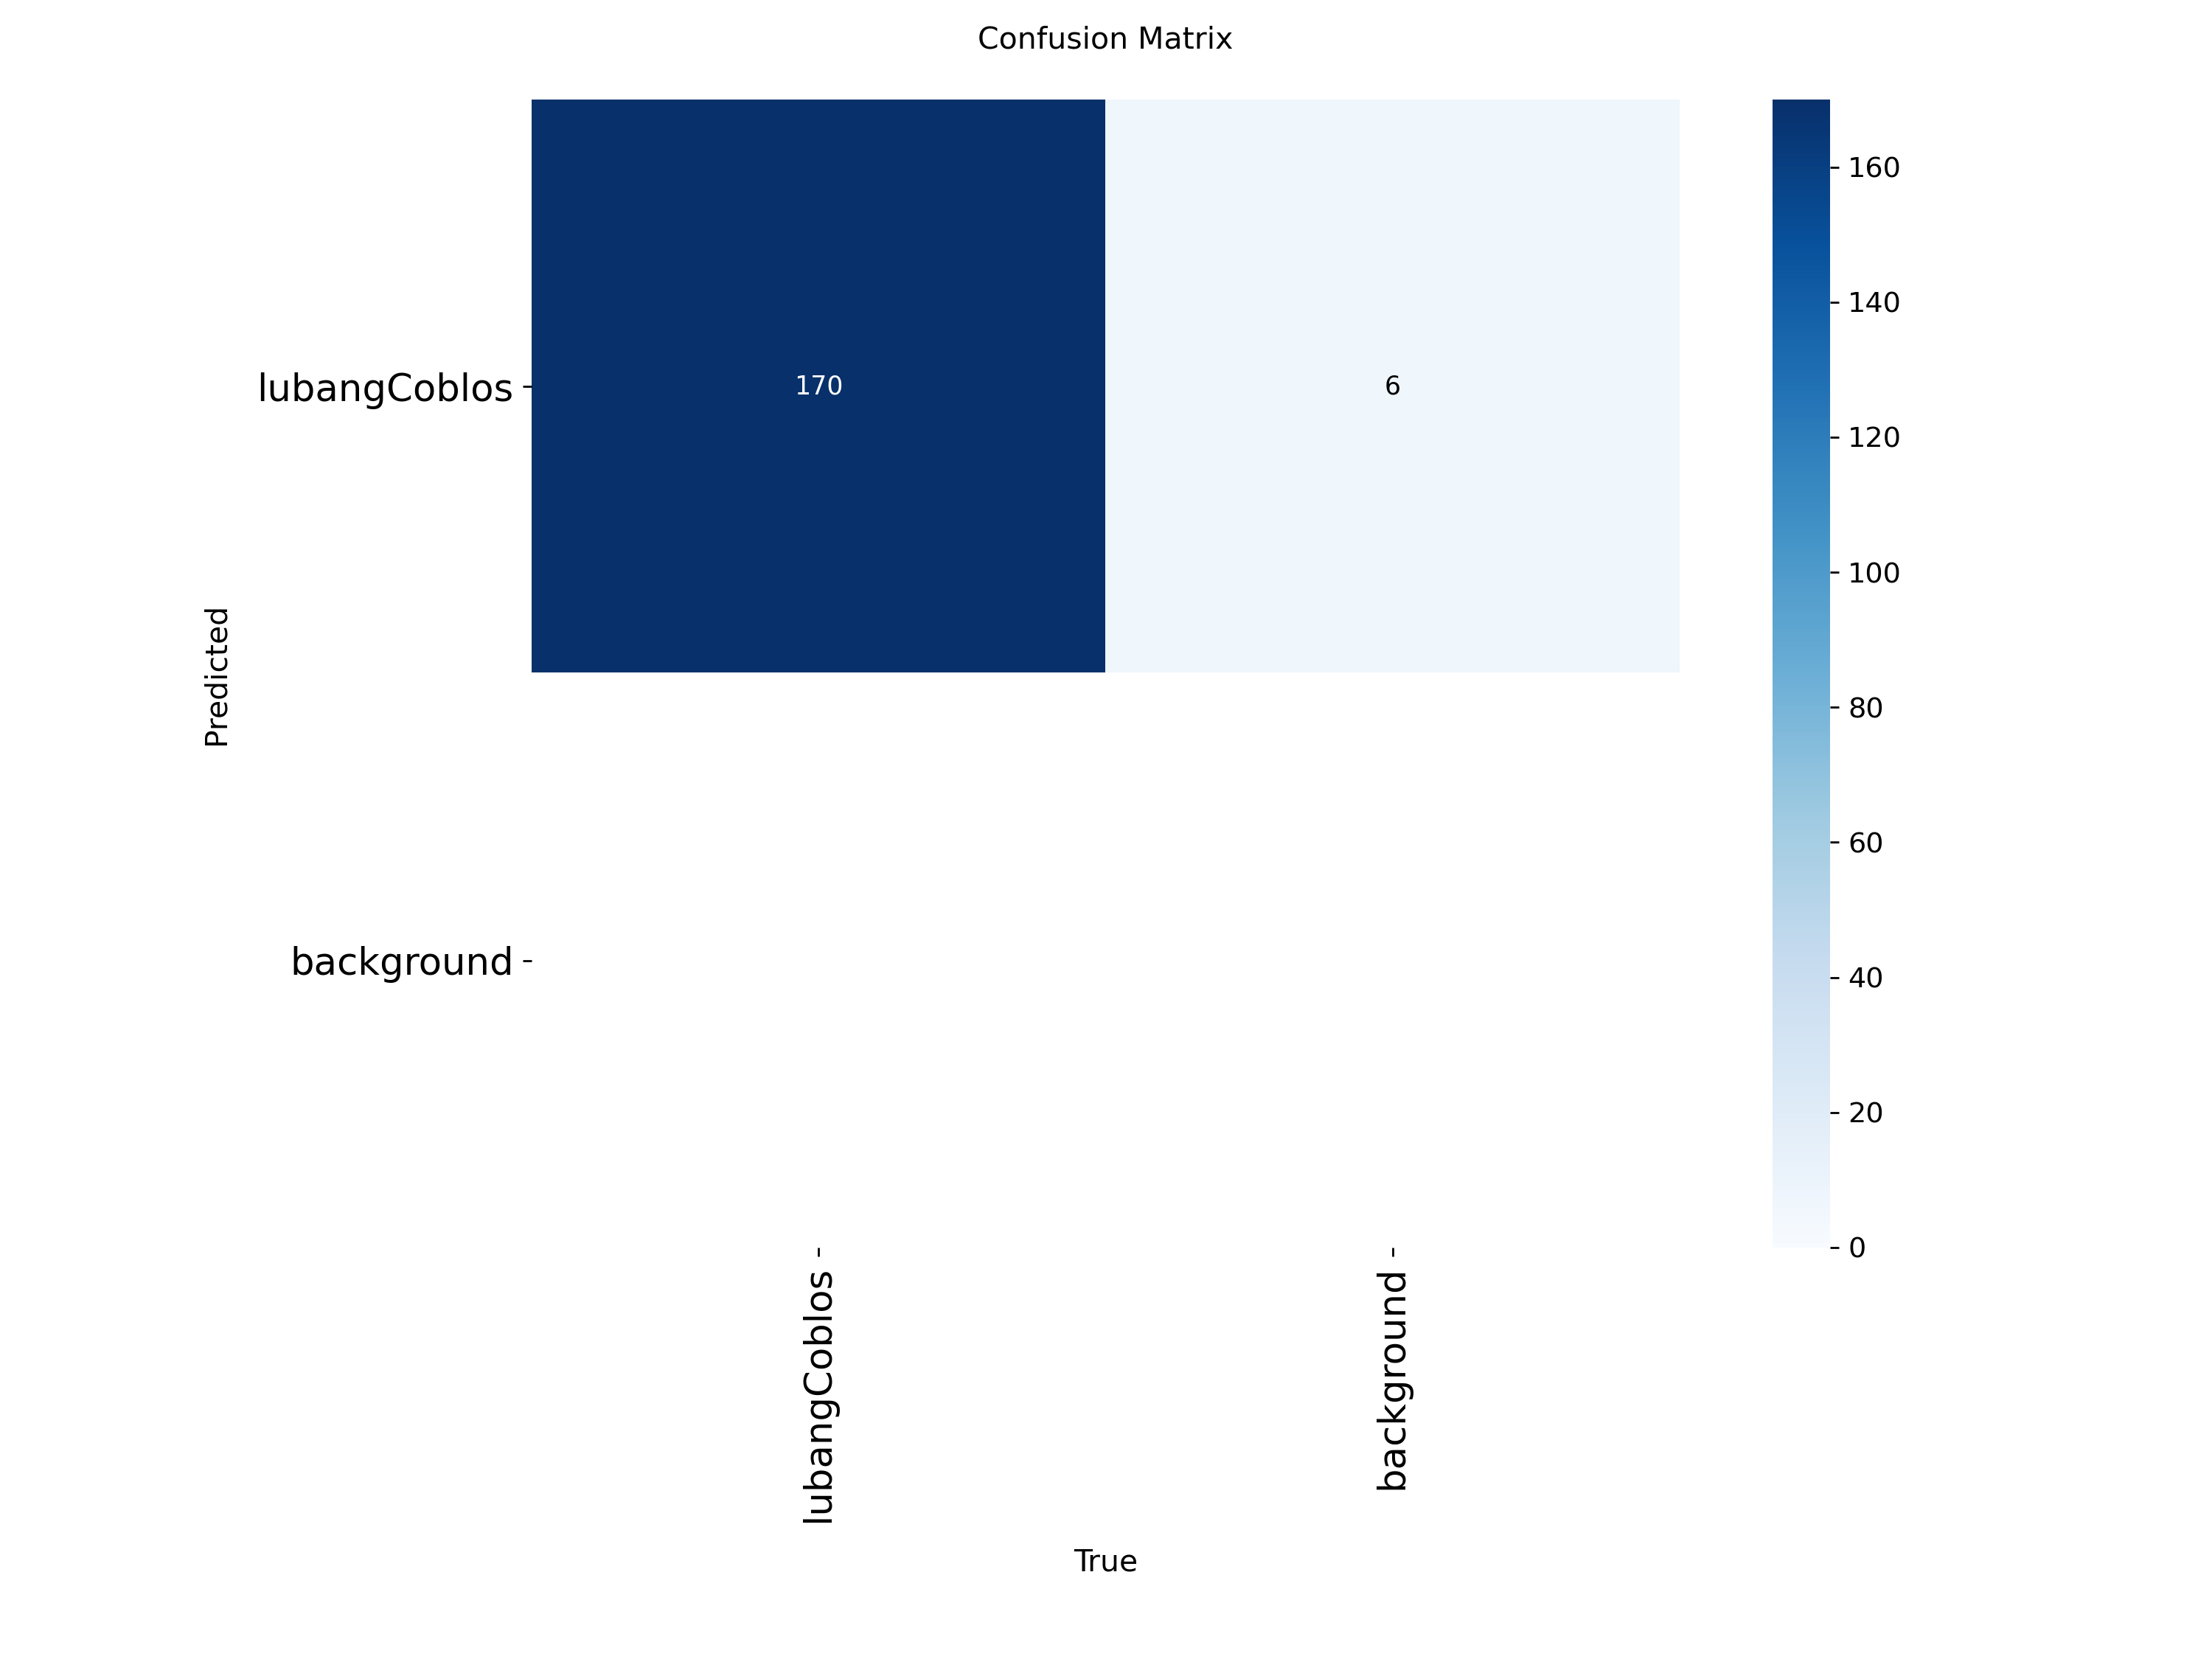

In [ ]:
Image(filename=f'/content/runs/segment/train/confusion_matrix.png', width=800)

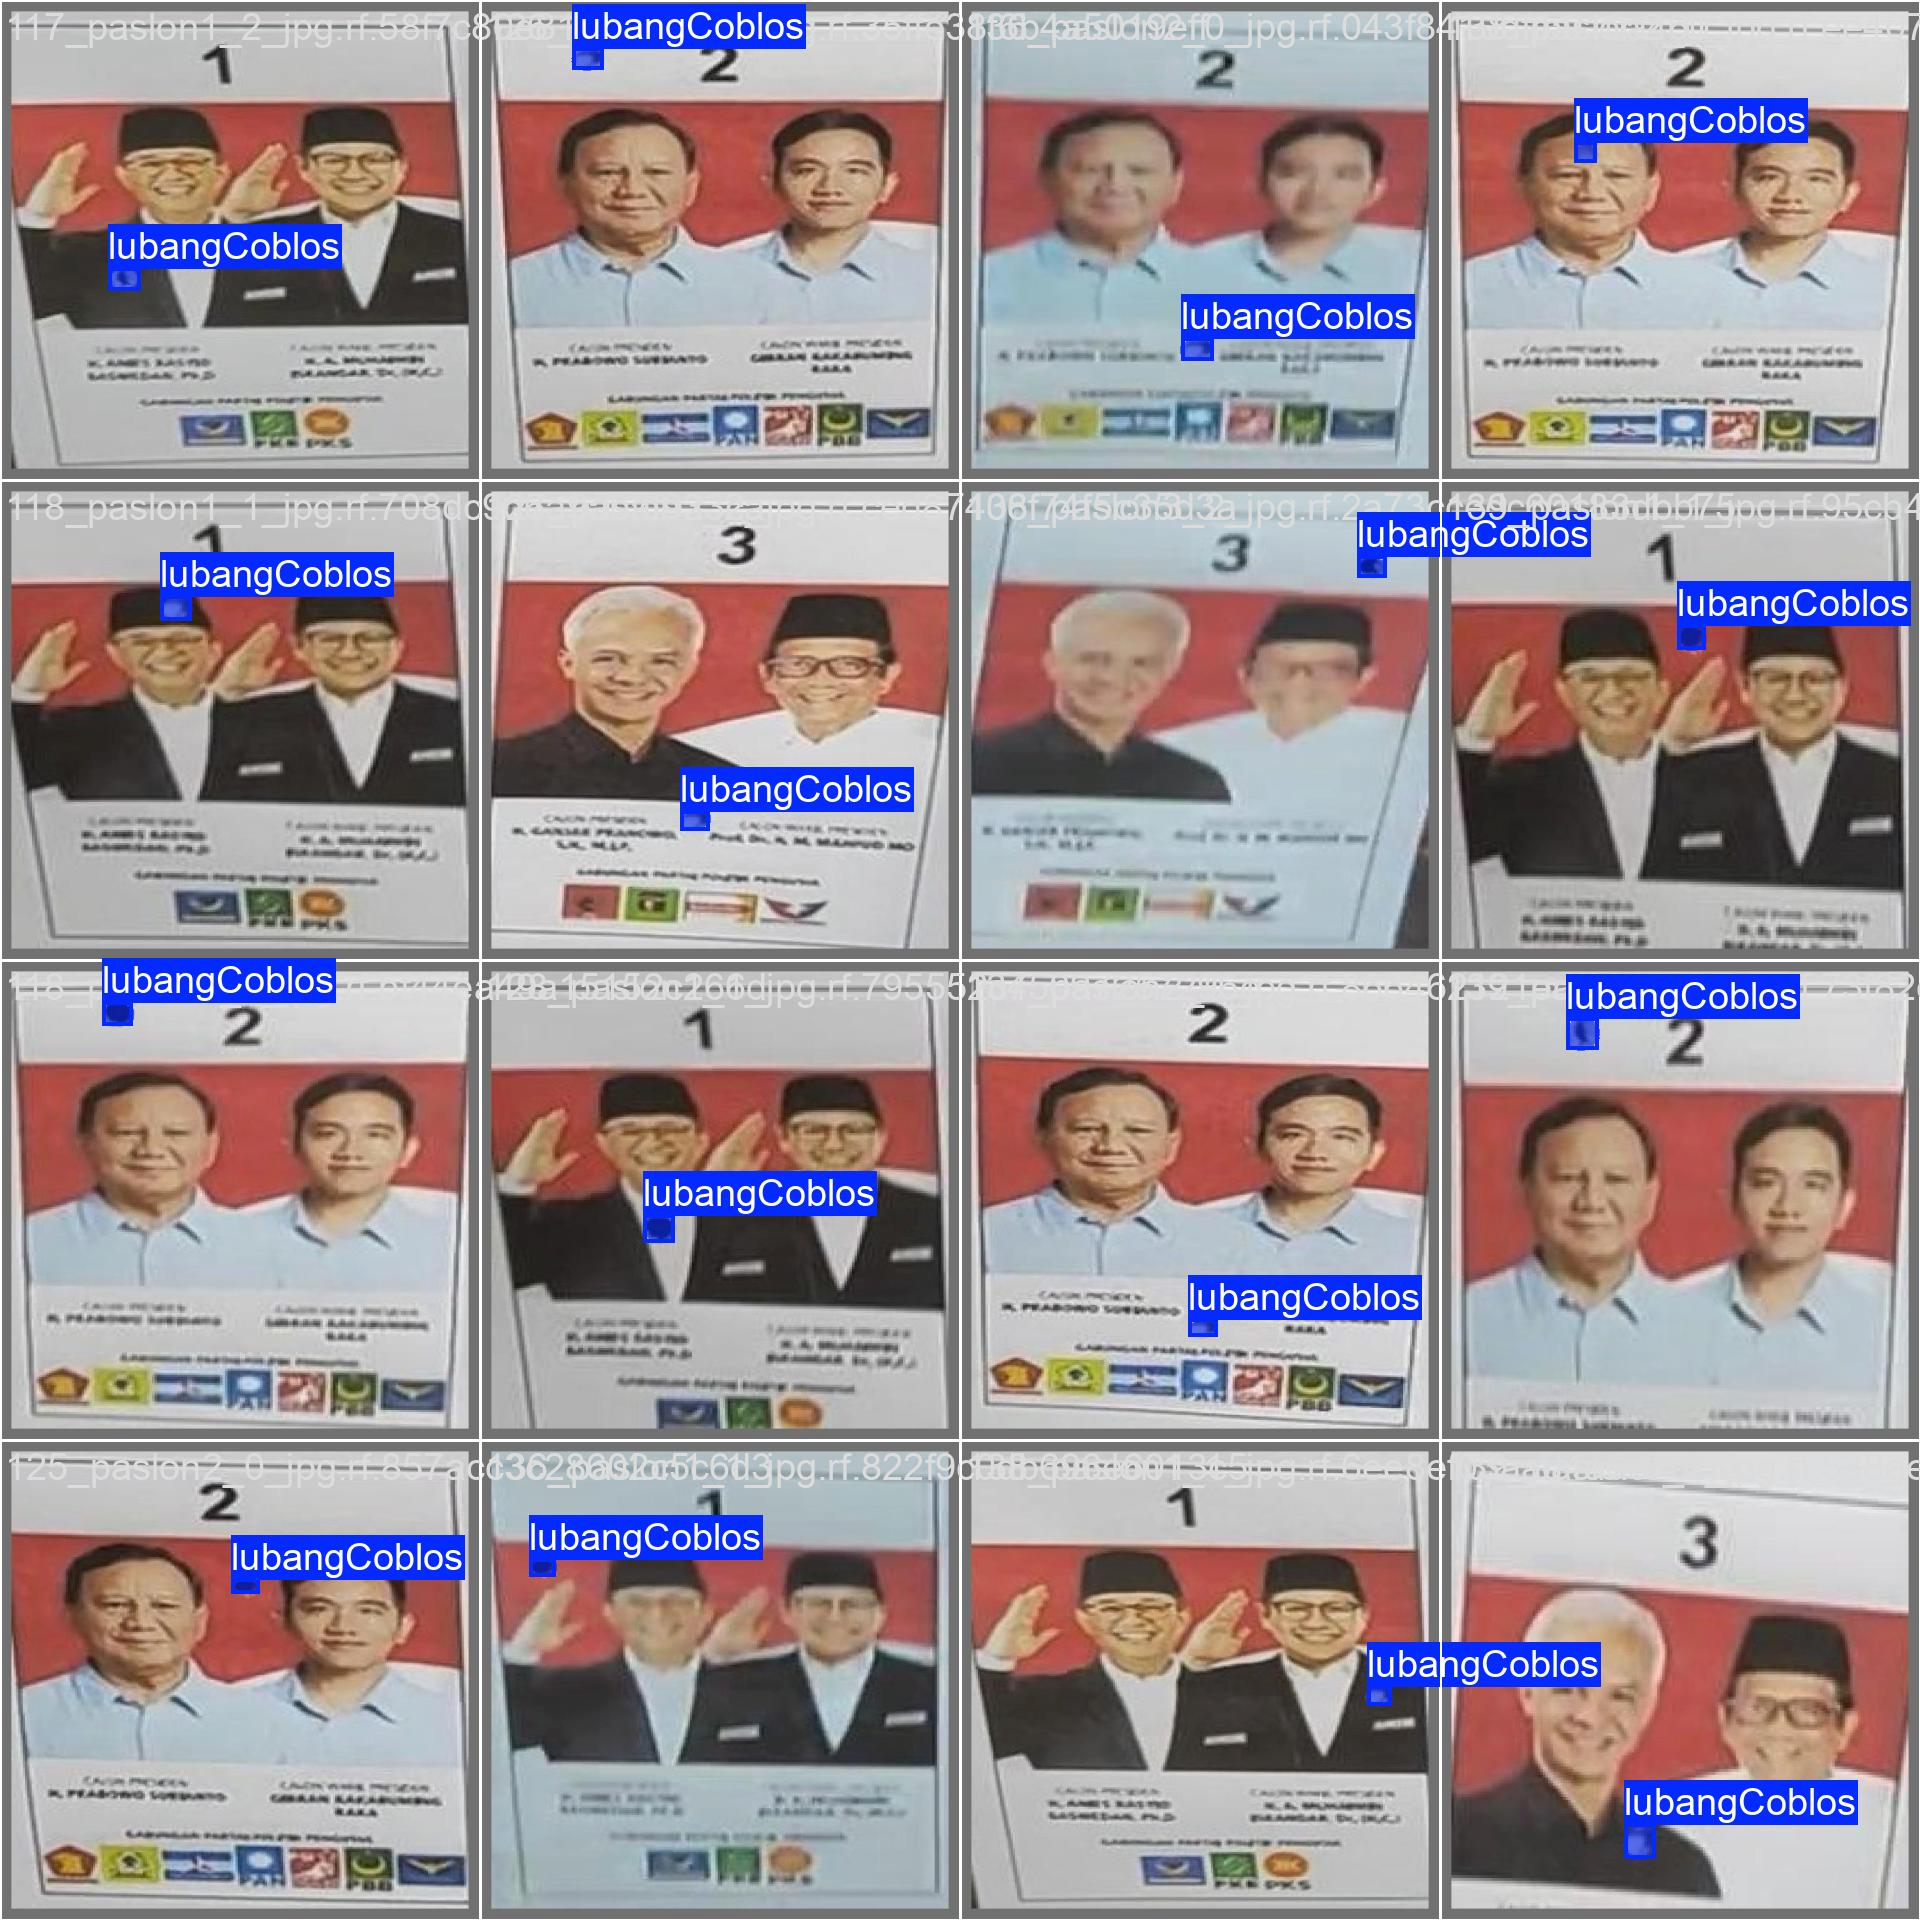

In [ ]:
Image(filename=f'/content/runs/segment/train/val_batch0_labels.jpg', width=800)

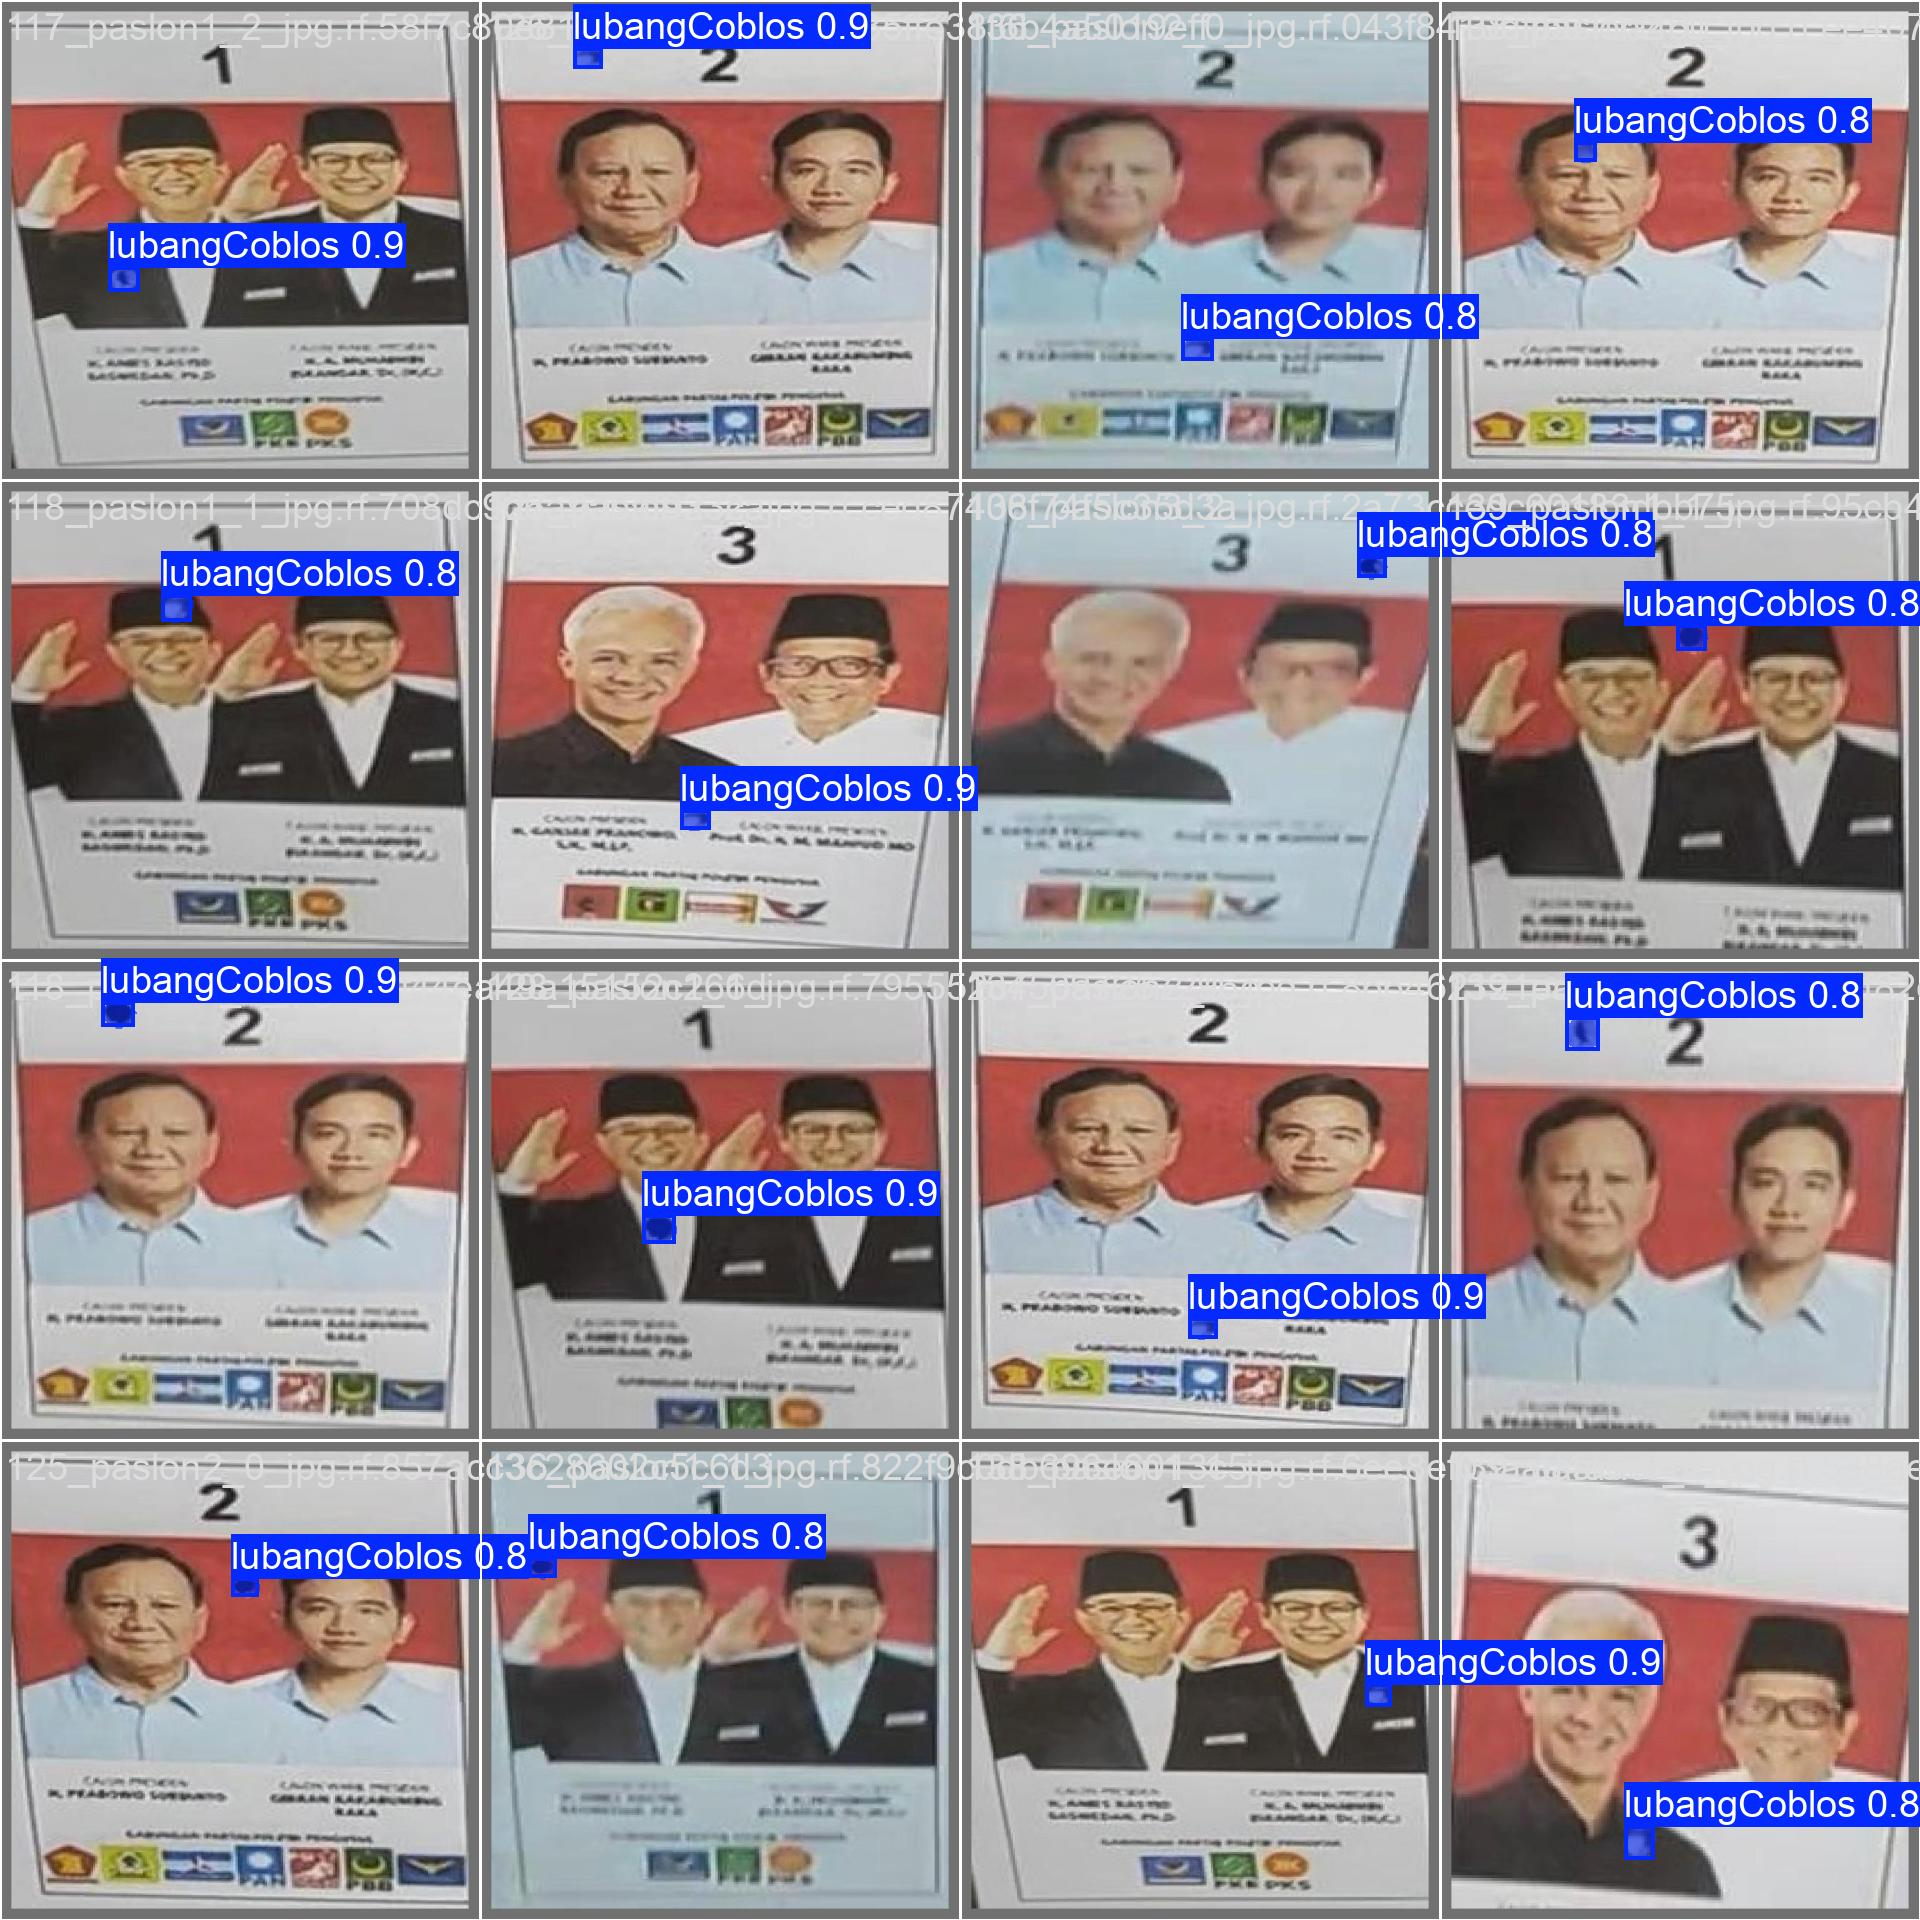

In [ ]:
Image(filename=f'/content/runs/segment/train/val_batch0_pred.jpg', width=800)

In [ ]:
!yolo task=detect mode=val model=/content/runs/segment/train/weights/best.pt data=/content/AnotasiSegmentasi-2/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1528.9±289.8 MB/s, size: 31.4 KB)
val: Scanning /content/AnotasiSegmentasi-2/valid/labels.cache... 170 images, 0 backgrounds, 0 corrupt: 100% 170/170 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 11/11 [00:05<00:00,  2.08it/s]
                   all        170        170      0.998          1      0.995      0.798      0.998          1      0.995      0.726
Speed: 2.5ms preprocess, 12.3ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model = YOLO('/content/runs/segment/train/weights/best.pt')

results = model.predict(source='/content/gdrive/MyDrive/DatasetSegAno/test', conf=0.4, save=True, boxes=False)

WARNING ⚠️ 'boxes' is deprecated and will be removed in in the future. Use 'show_boxes' instead.

image 1/170 /content/gdrive/MyDrive/DatasetSegAno/test/117_paslon1_2_jpg.rf.58f7c80e815edb11d993060485ea7dc0.jpg: 640x640 1 lubangCoblos, 21.5ms
image 2/170 /content/gdrive/MyDrive/DatasetSegAno/test/118_paslon1_1_jpg.rf.708dc9d6a9abaf923ca92d0791a2fe0a.jpg: 640x640 1 lubangCoblos, 43.6ms
image 3/170 /content/gdrive/MyDrive/DatasetSegAno/test/118_paslon2_0_jpg.rf.bf44ea49a15152c266d400ef482f431b.jpg: 640x640 1 lubangCoblos, 20.3ms
image 4/170 /content/gdrive/MyDrive/DatasetSegAno/test/125_paslon2_0_jpg.rf.857acc3c28602c5c6d3dd69a644b9b38.jpg: 640x640 1 lubangCoblos, 20.3ms
image 5/170 /content/gdrive/MyDrive/DatasetSegAno/test/126_paslon2_0_jpg.rf.35ffe38f6b4a5019eff5e058318bf022.jpg: 640x640 1 lubangCoblos, 23.2ms
image 6/170 /content/gdrive/MyDrive/DatasetSegAno/test/127_paslon3_2_jpg.rf.ced87408f74f5c35d3ae9887c12b1960.jpg: 640x640 1 lubangCoblos, 20.2ms
image 7/170 /content/gdrive/MyDr

In [ ]:
model = YOLO('/content/runs/segment/train/weights/best.pt')

results = model.predict(source='/content/gdrive/MyDrive/DatasetSegAno/test', conf=0.4, save=True)


image 1/170 /content/gdrive/MyDrive/DatasetSegAno/test/117_paslon1_2_jpg.rf.58f7c80e815edb11d993060485ea7dc0.jpg: 640x640 1 lubangCoblos, 20.1ms
image 2/170 /content/gdrive/MyDrive/DatasetSegAno/test/118_paslon1_1_jpg.rf.708dc9d6a9abaf923ca92d0791a2fe0a.jpg: 640x640 1 lubangCoblos, 20.1ms
image 3/170 /content/gdrive/MyDrive/DatasetSegAno/test/118_paslon2_0_jpg.rf.bf44ea49a15152c266d400ef482f431b.jpg: 640x640 1 lubangCoblos, 20.2ms
image 4/170 /content/gdrive/MyDrive/DatasetSegAno/test/125_paslon2_0_jpg.rf.857acc3c28602c5c6d3dd69a644b9b38.jpg: 640x640 1 lubangCoblos, 20.1ms
image 5/170 /content/gdrive/MyDrive/DatasetSegAno/test/126_paslon2_0_jpg.rf.35ffe38f6b4a5019eff5e058318bf022.jpg: 640x640 1 lubangCoblos, 15.5ms
image 6/170 /content/gdrive/MyDrive/DatasetSegAno/test/127_paslon3_2_jpg.rf.ced87408f74f5c35d3ae9887c12b1960.jpg: 640x640 1 lubangCoblos, 15.5ms
image 7/170 /content/gdrive/MyDrive/DatasetSegAno/test/128_paslon1_1_jpg.rf.795552c45097257296ce1fcfdd054cbe.jpg: 640x640 1 luban

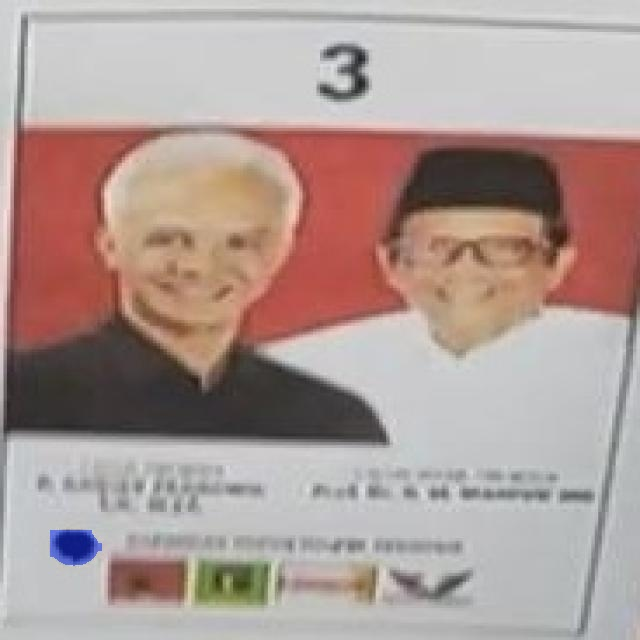

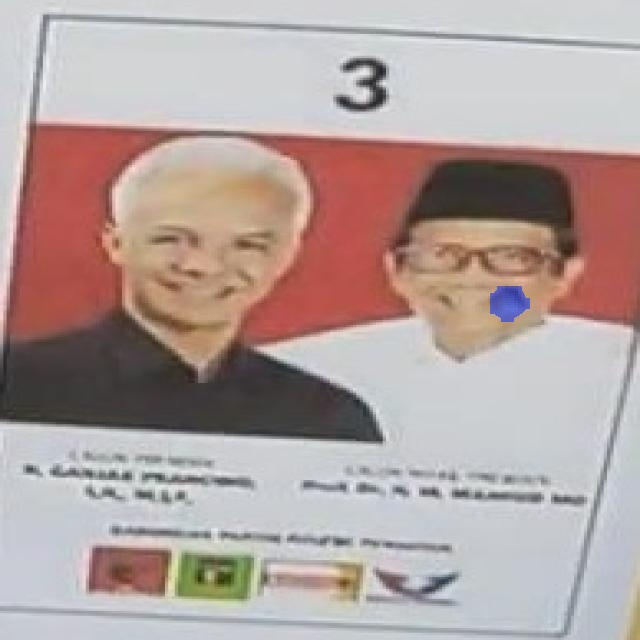

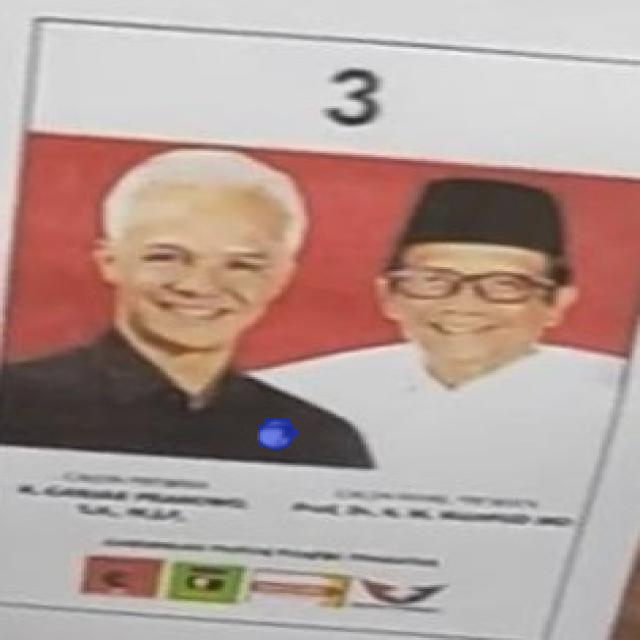

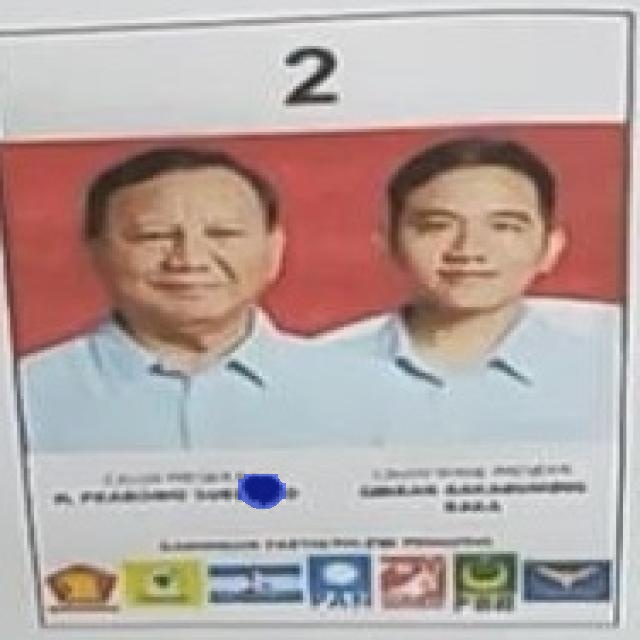

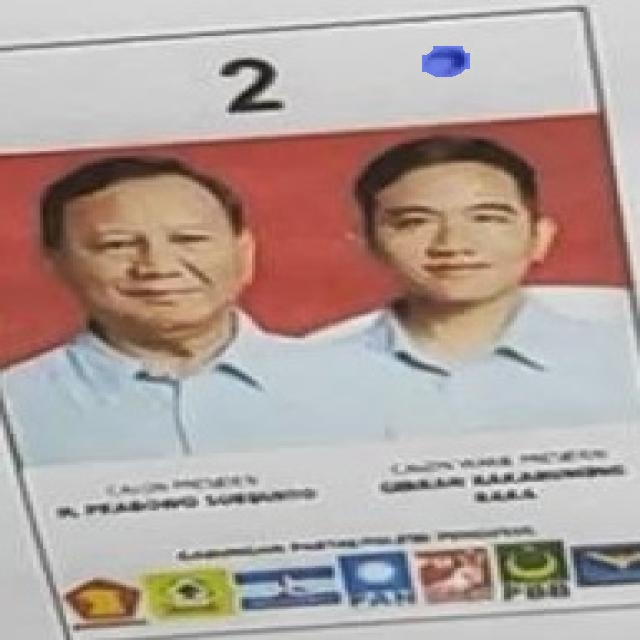

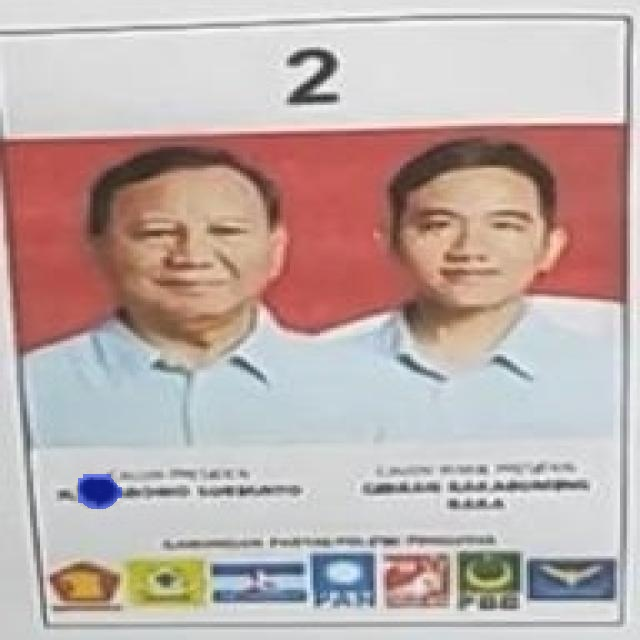

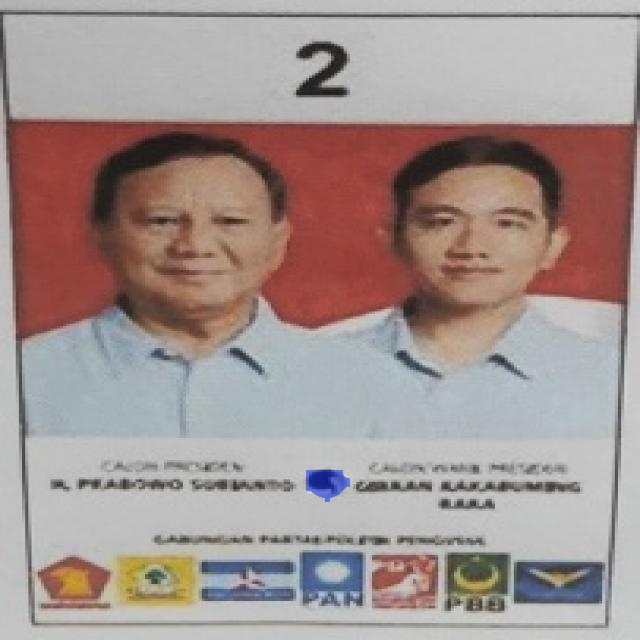

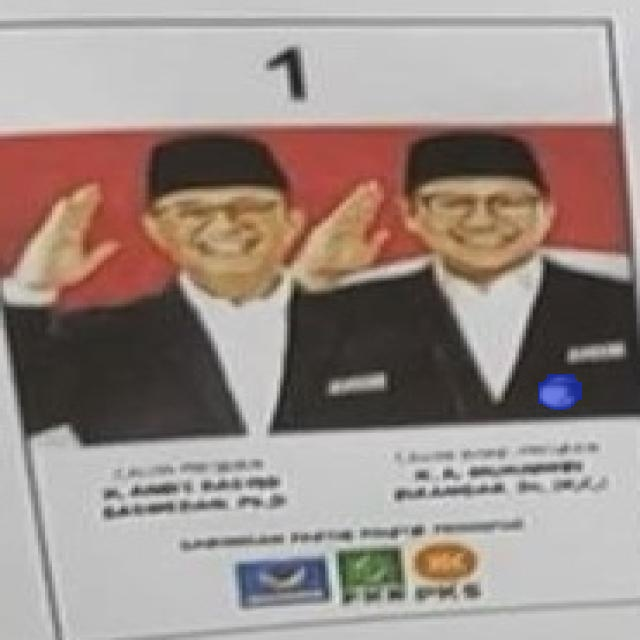

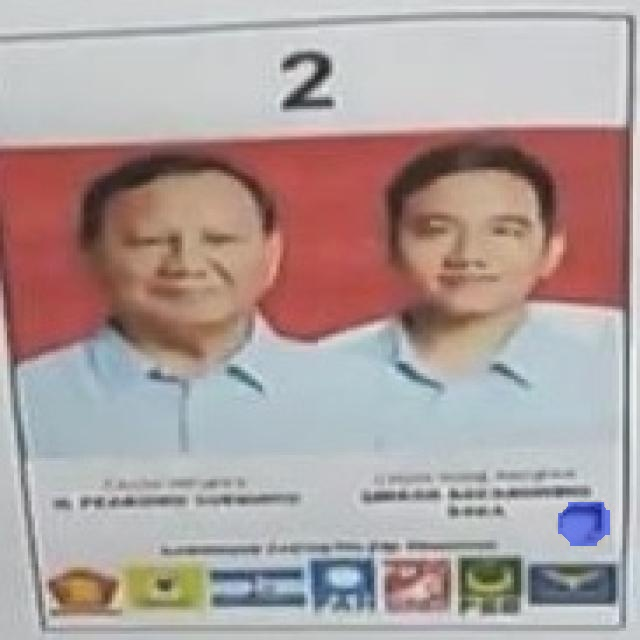

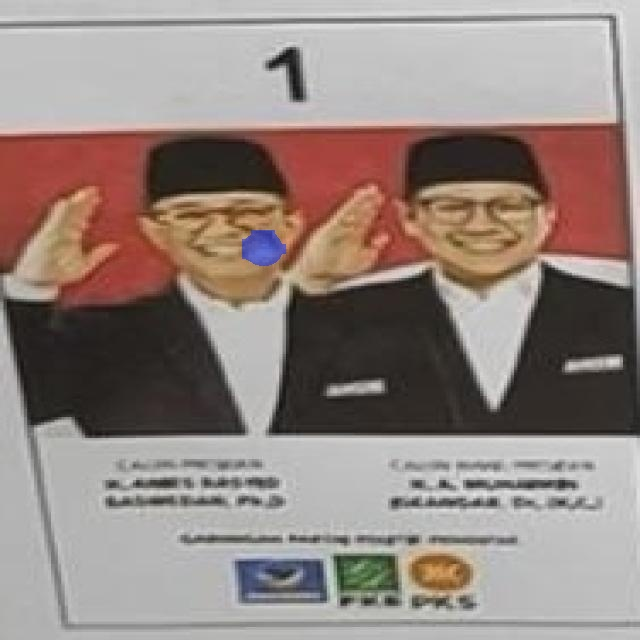

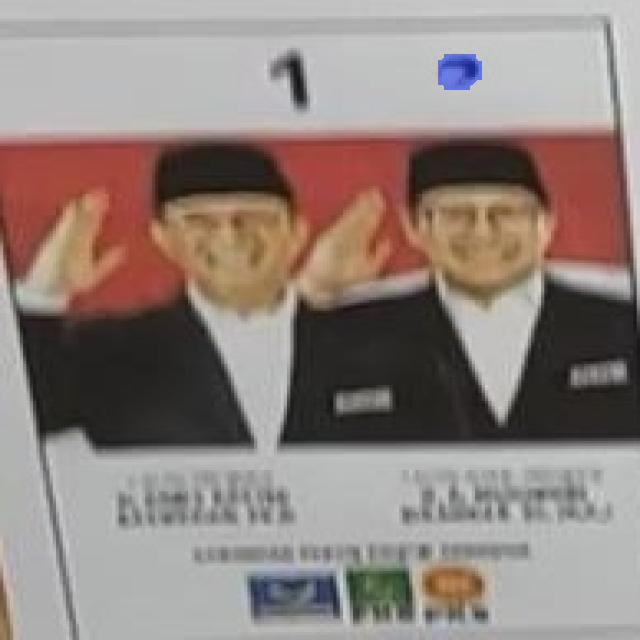

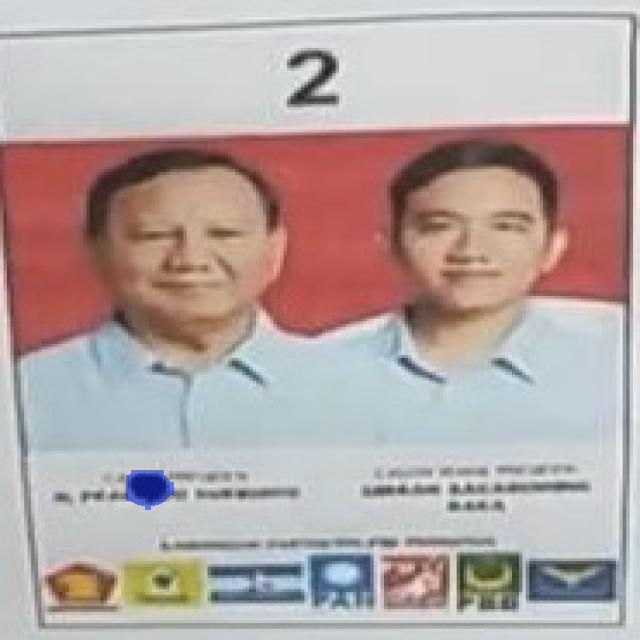

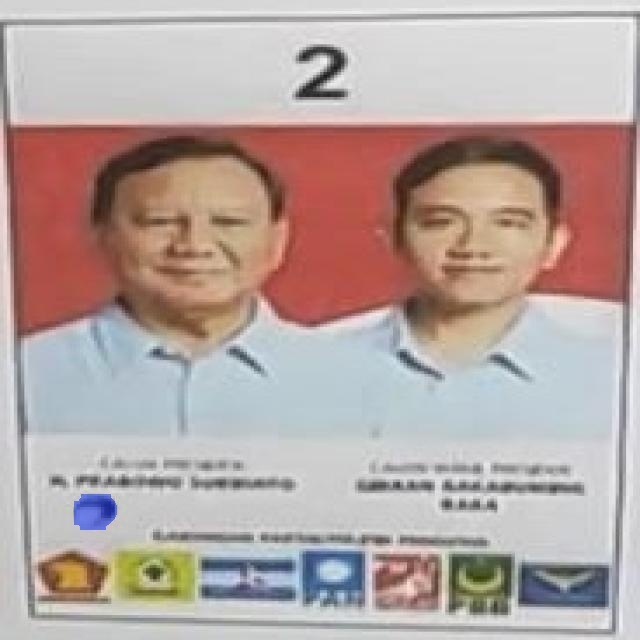

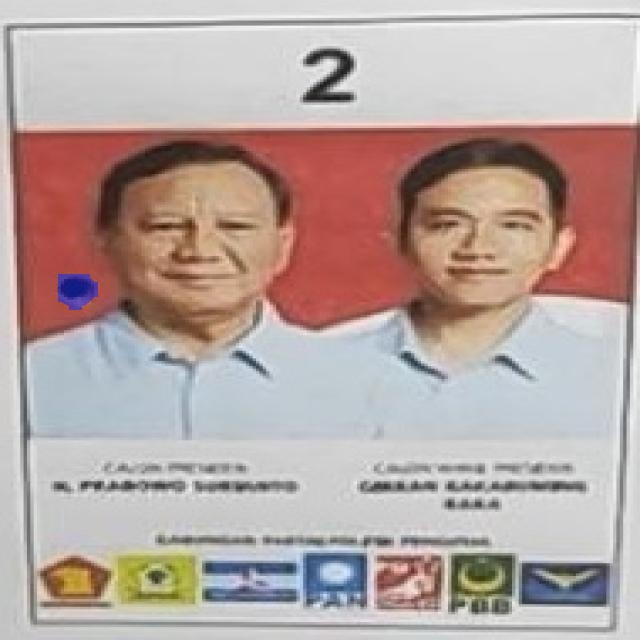

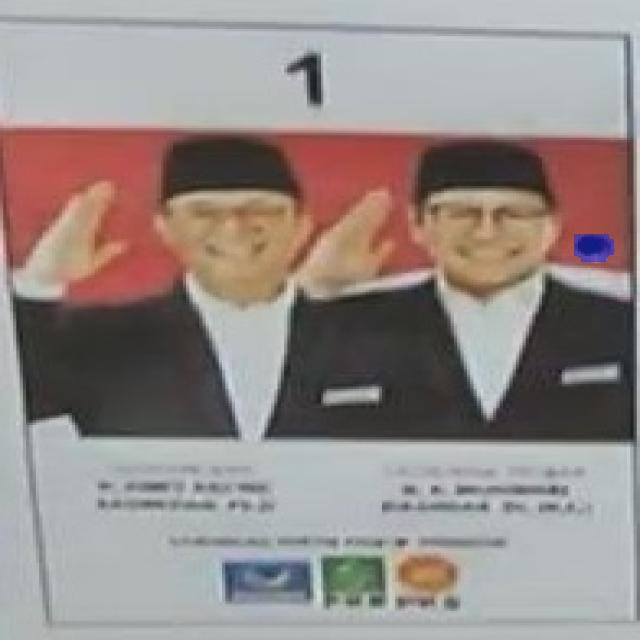

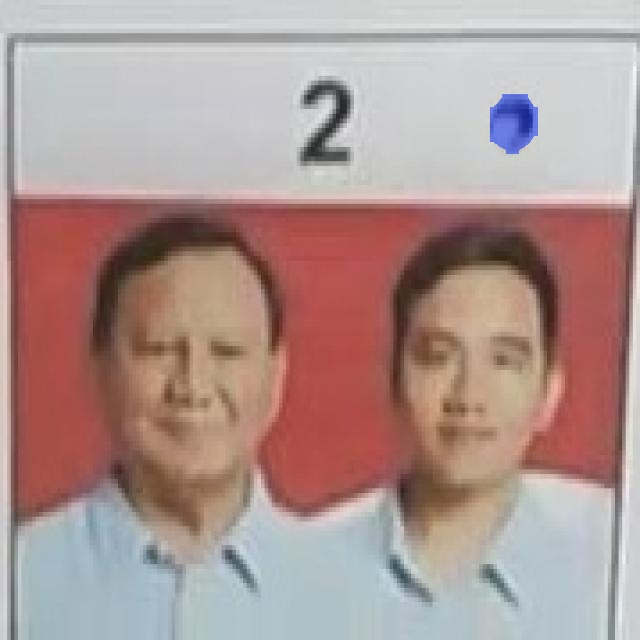

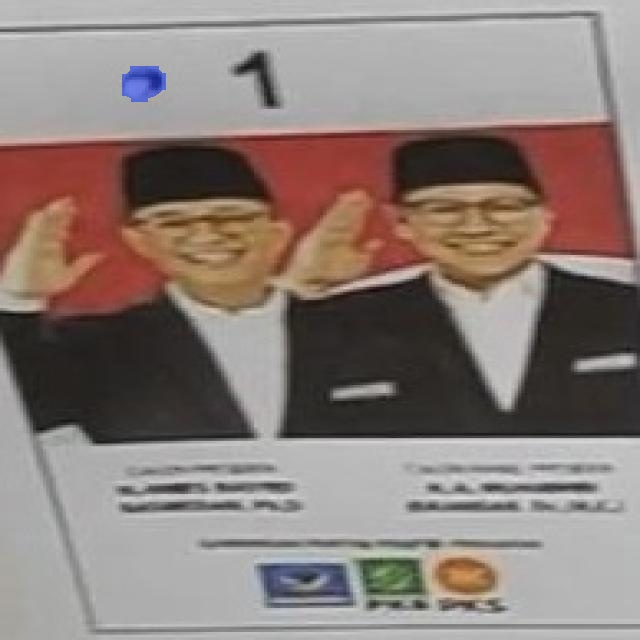

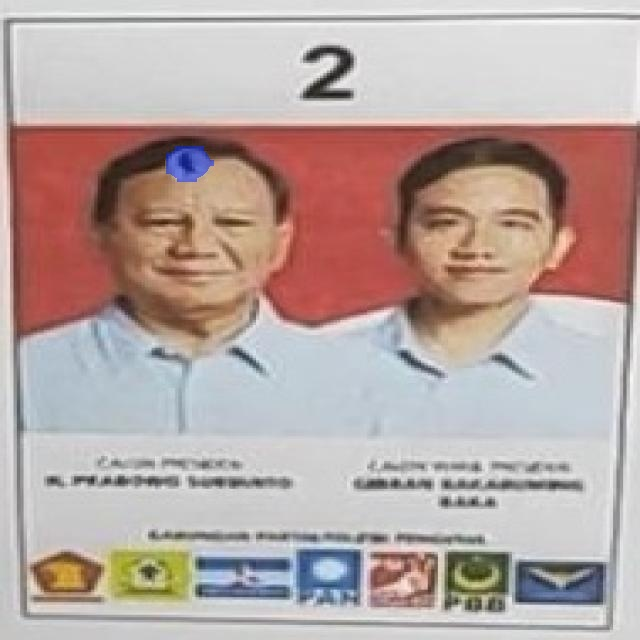

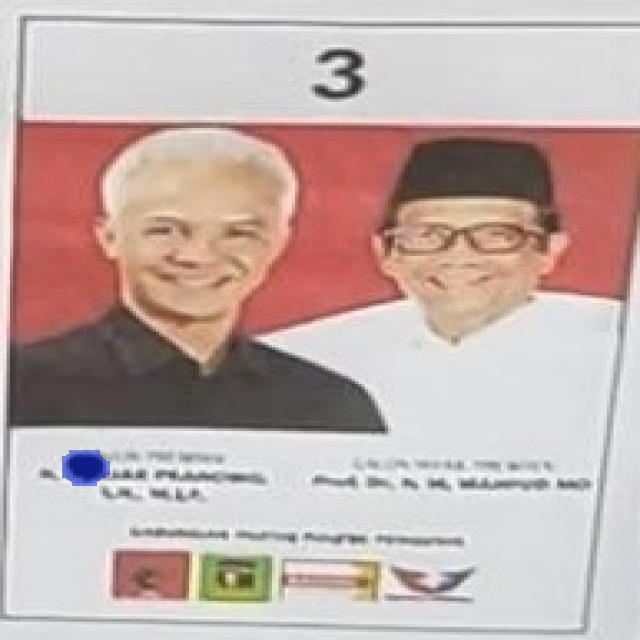

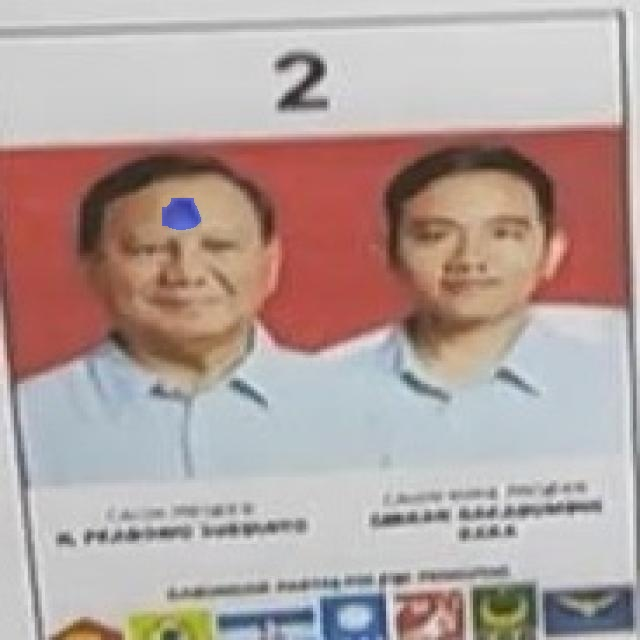

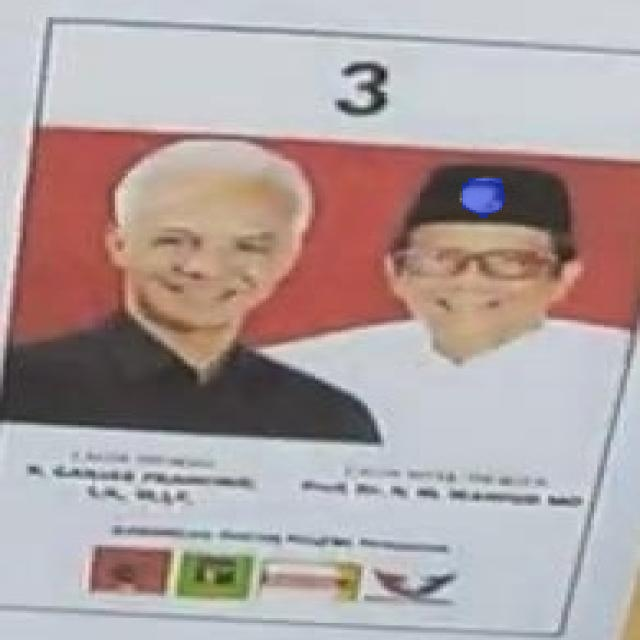

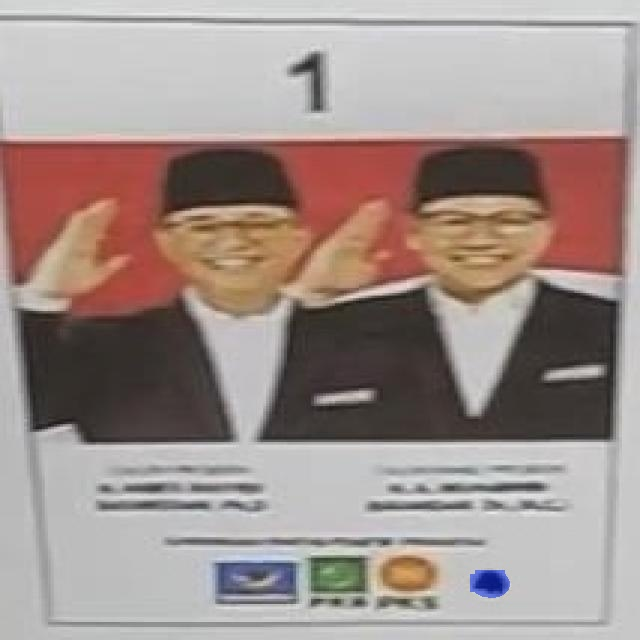

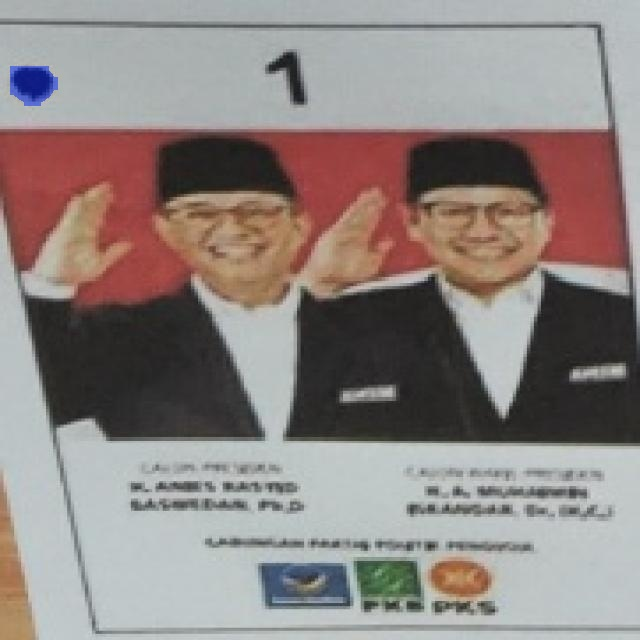

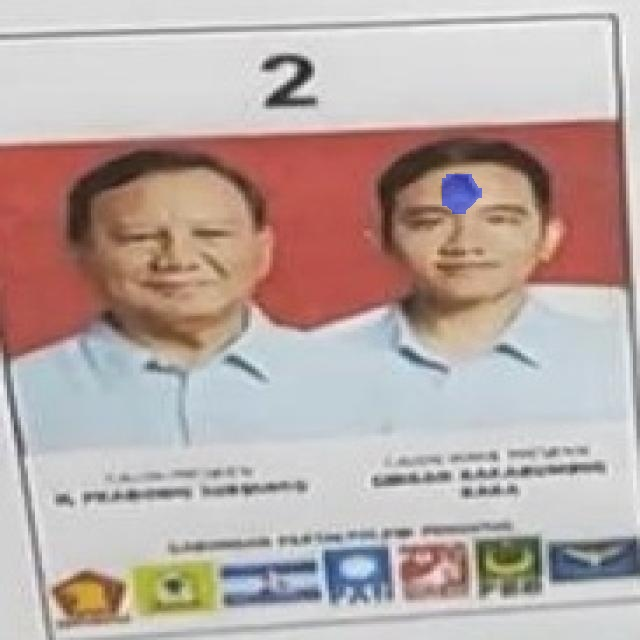

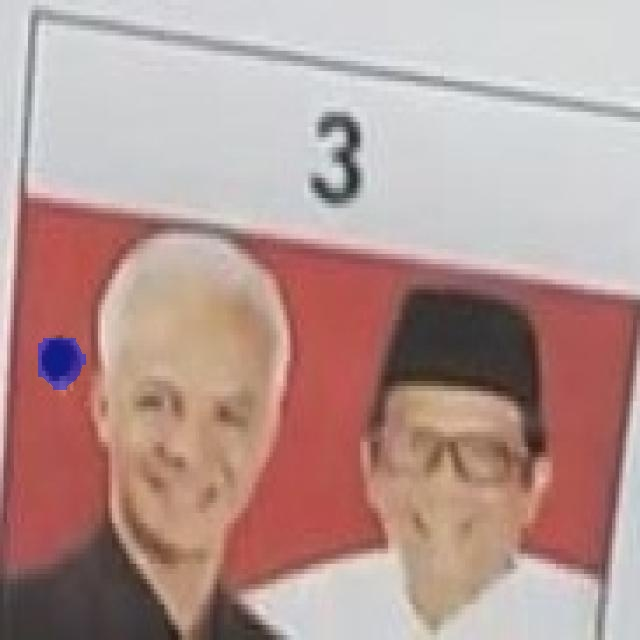

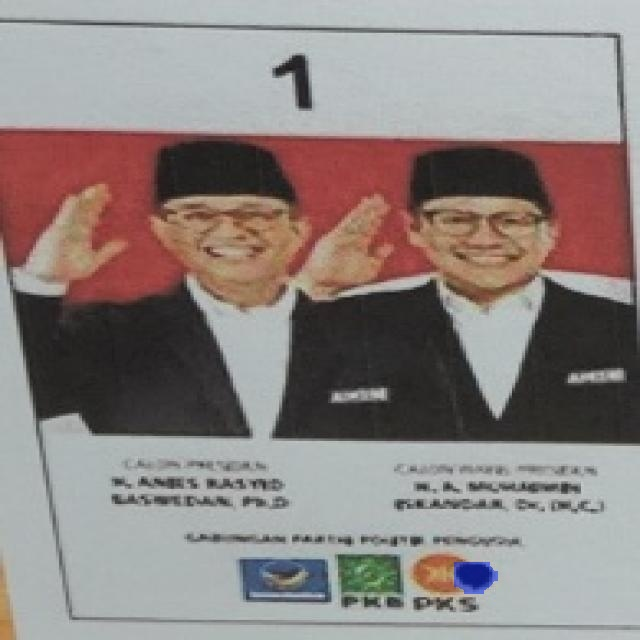

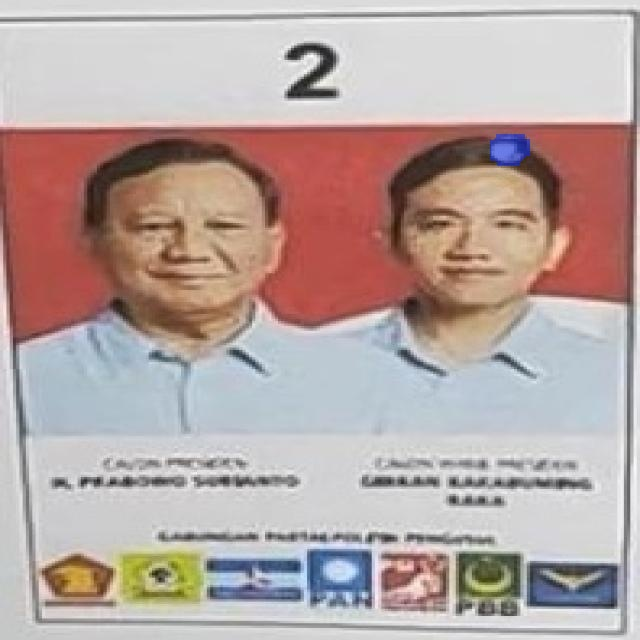

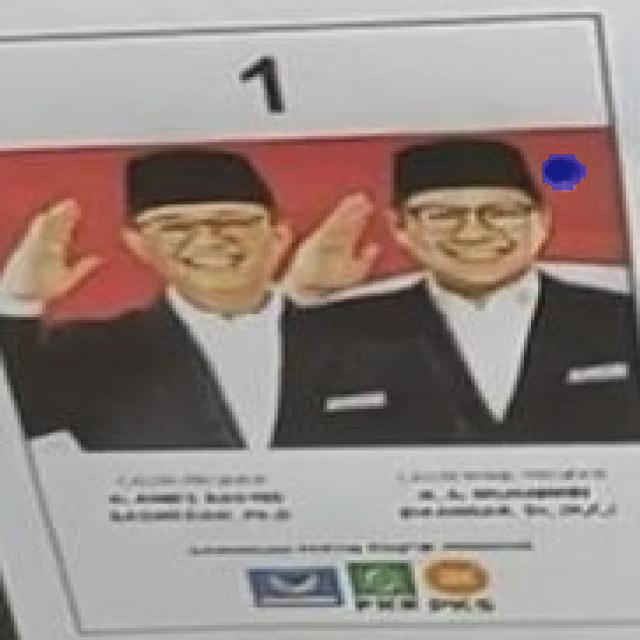

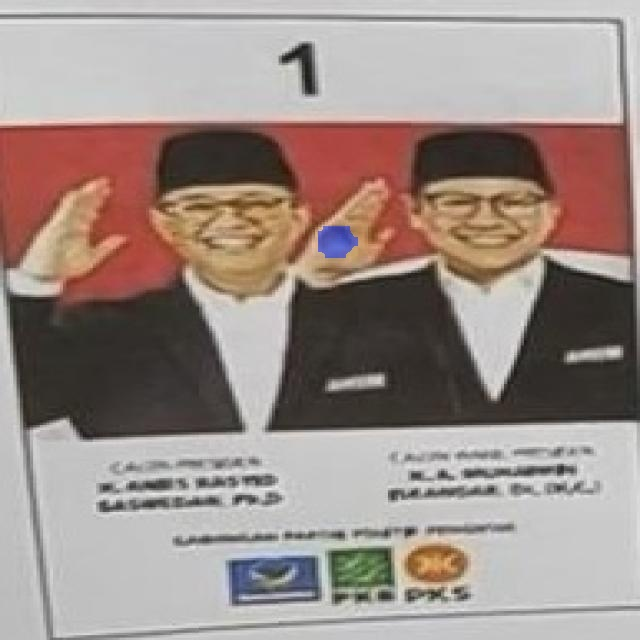

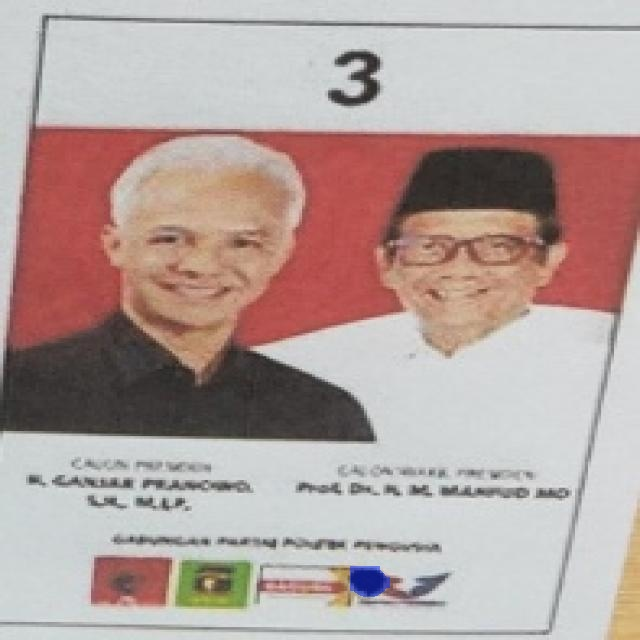

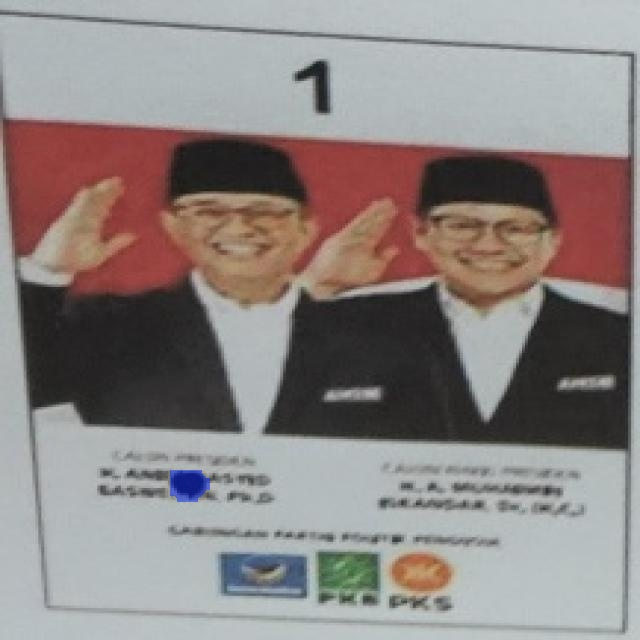

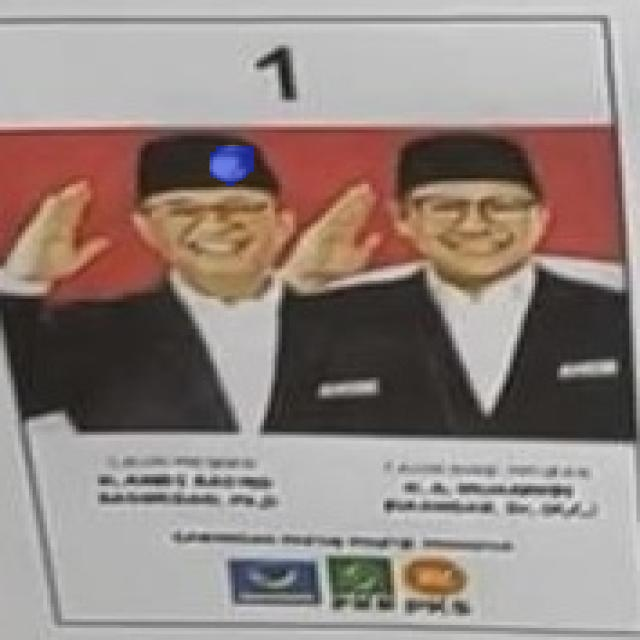

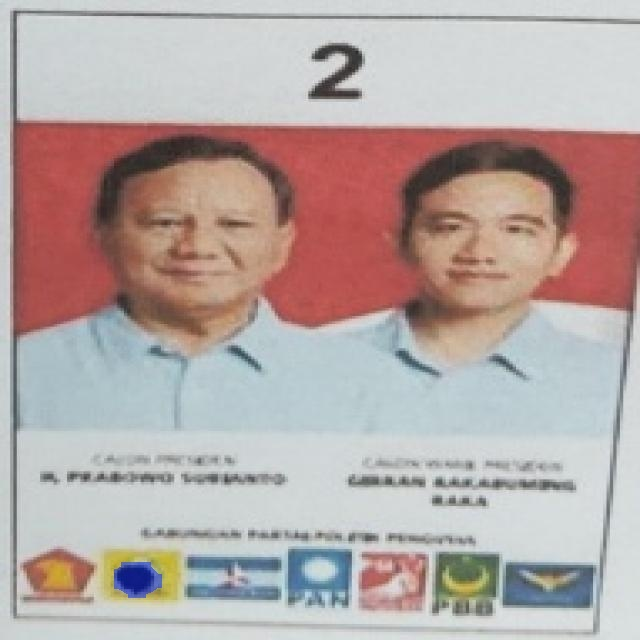

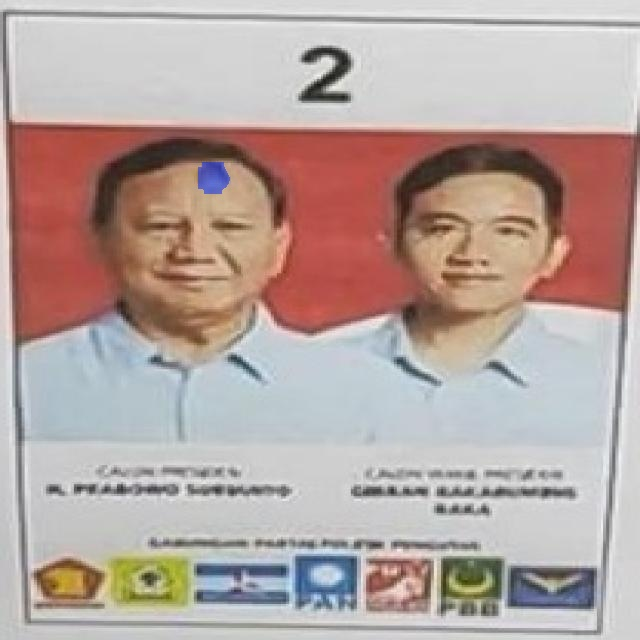

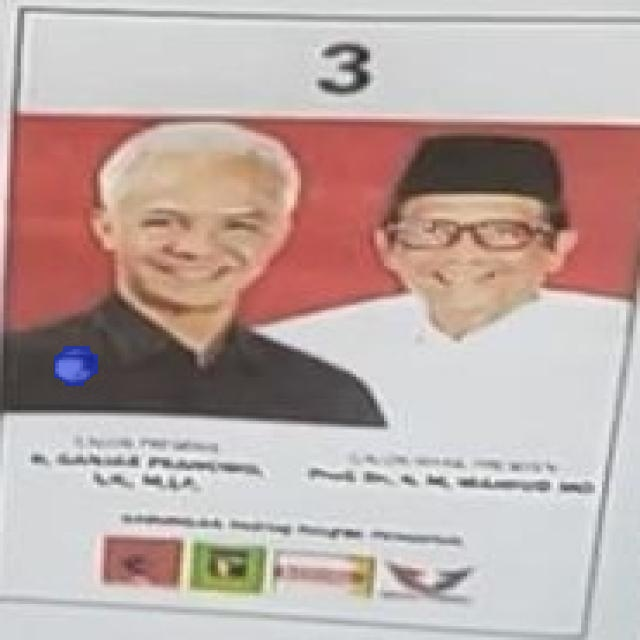

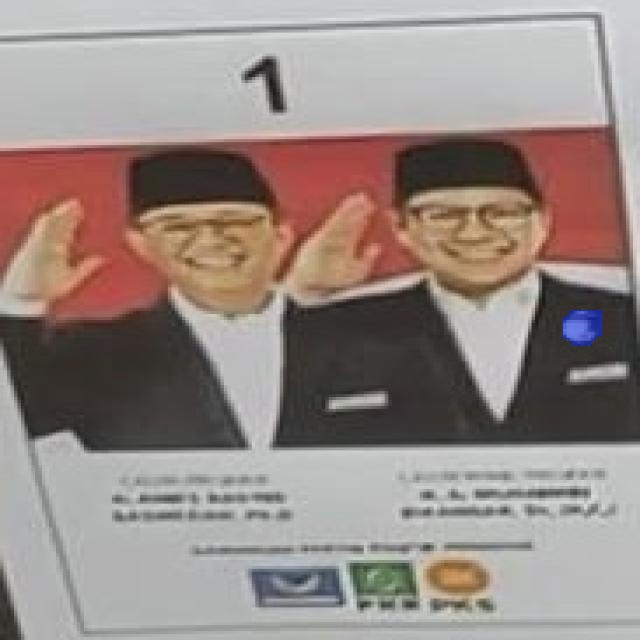

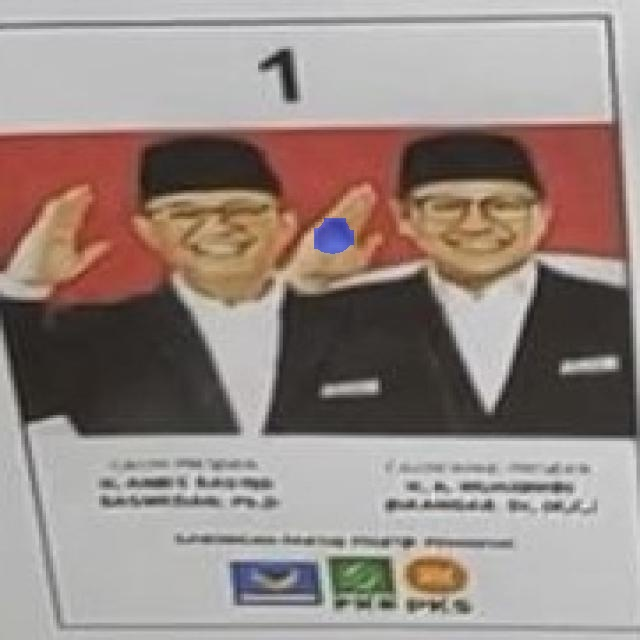

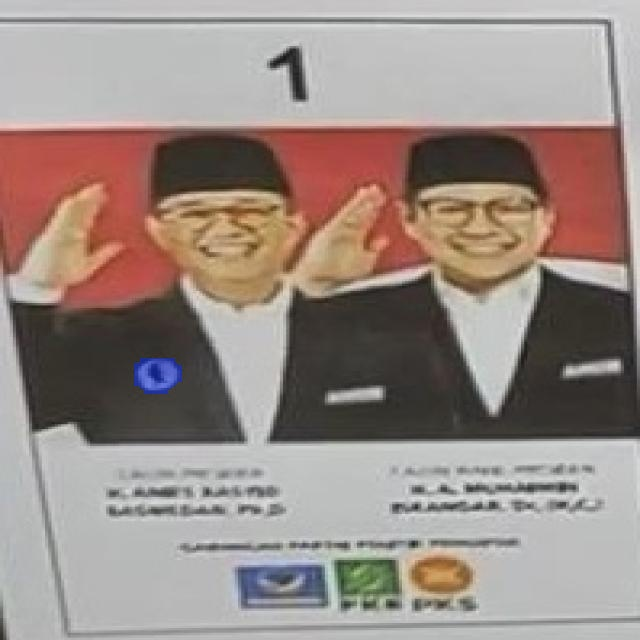

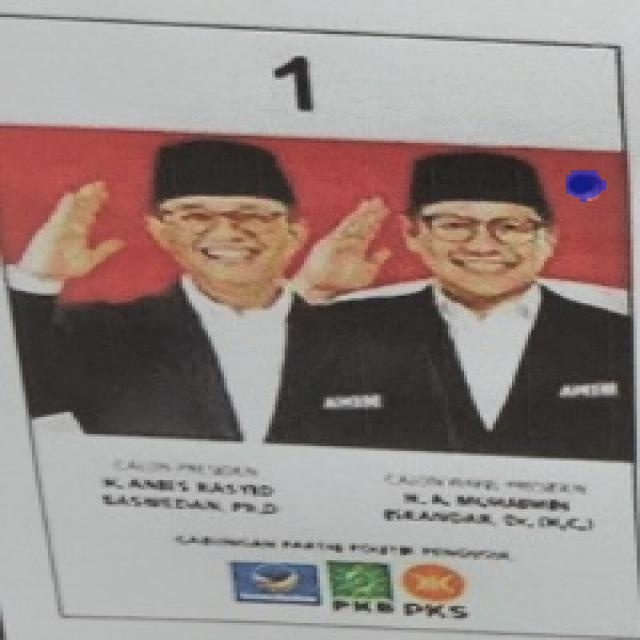

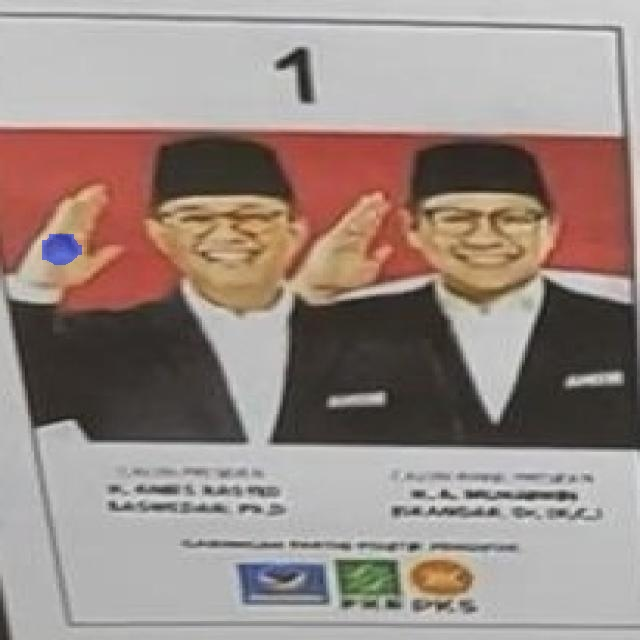

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/segment/predict/*.jpg')[:40]:
      display(Image(filename=image_path, width=600))
      print("\n")

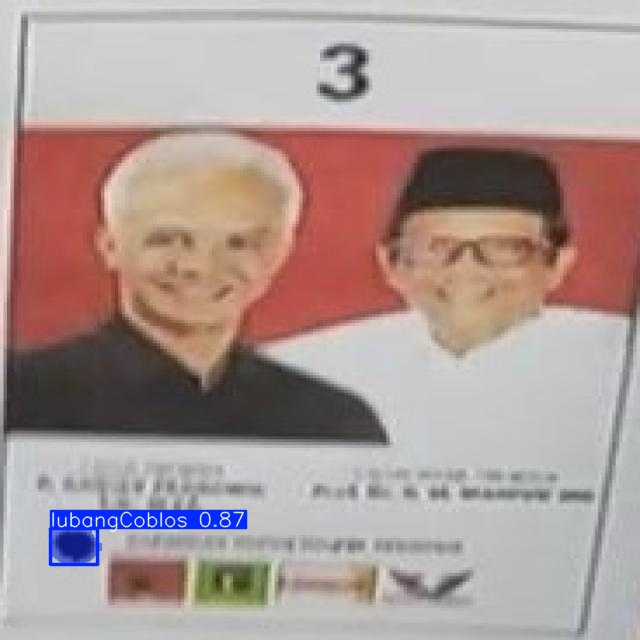

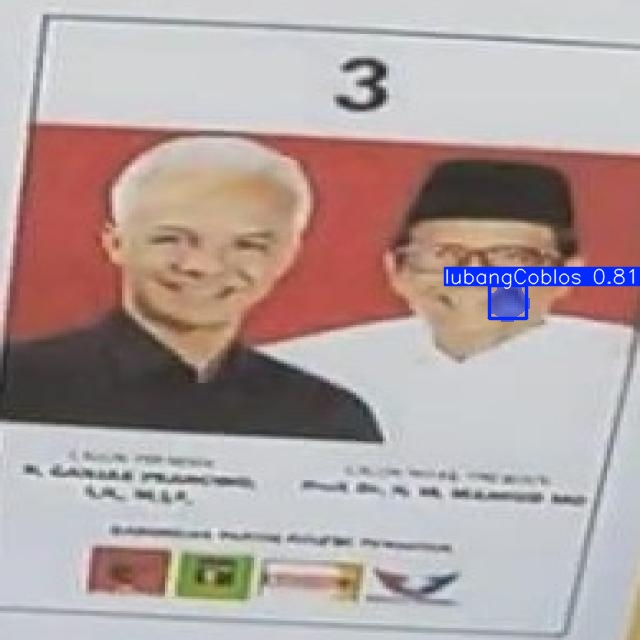

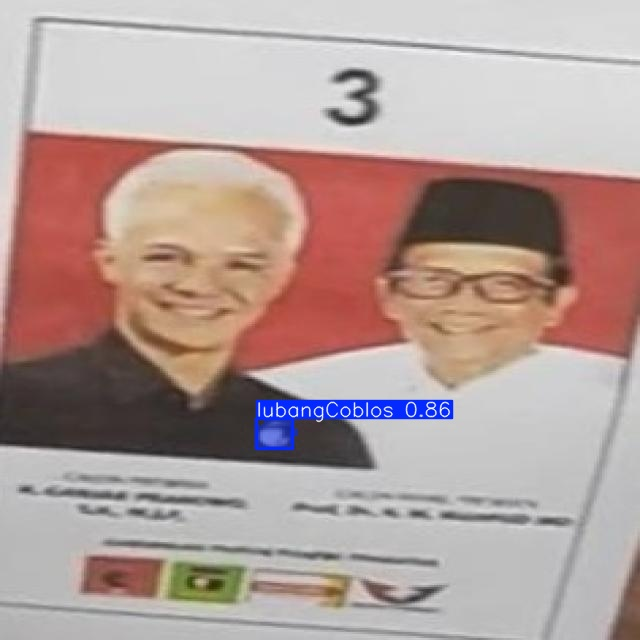

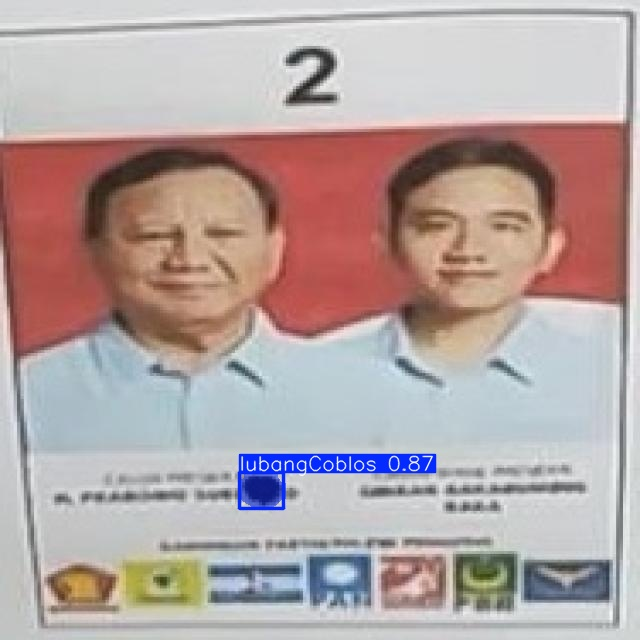

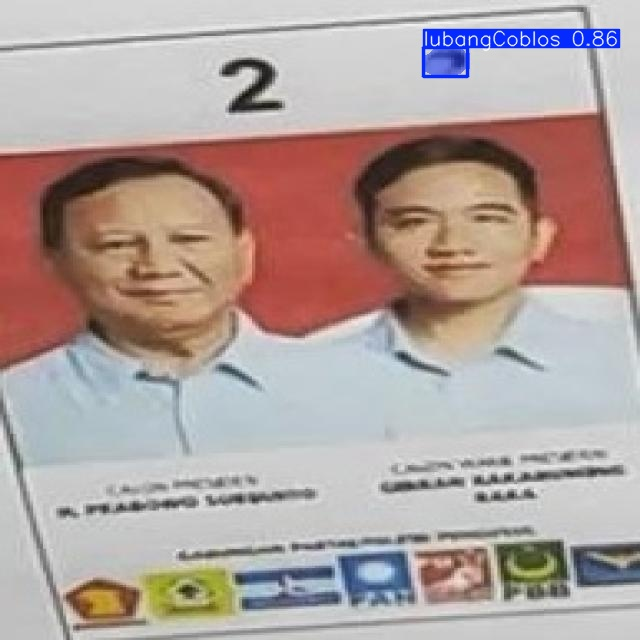

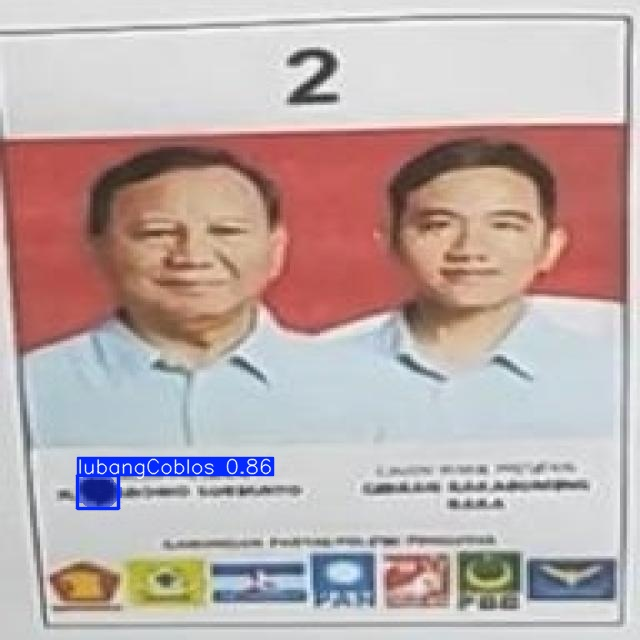

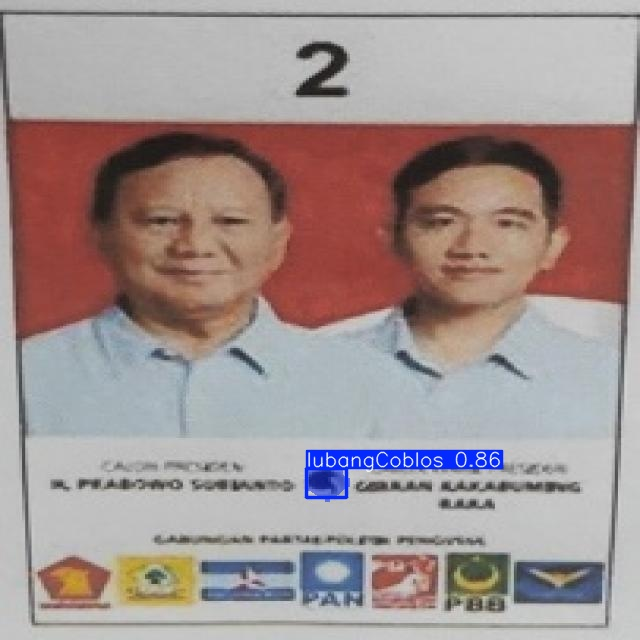

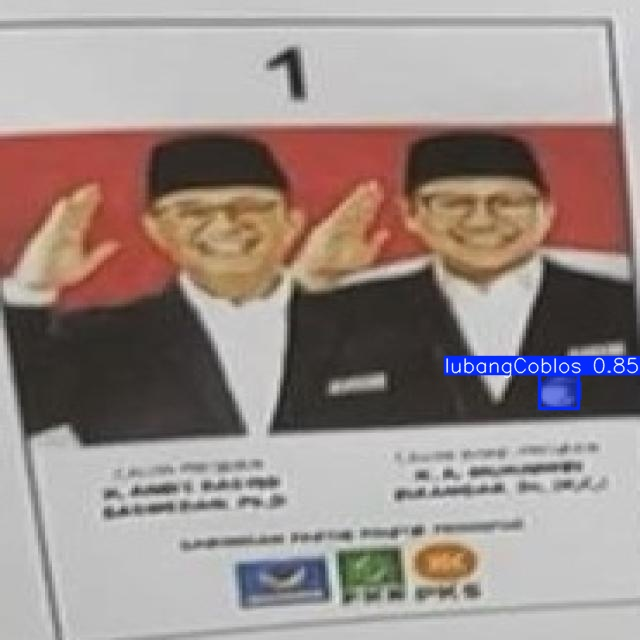

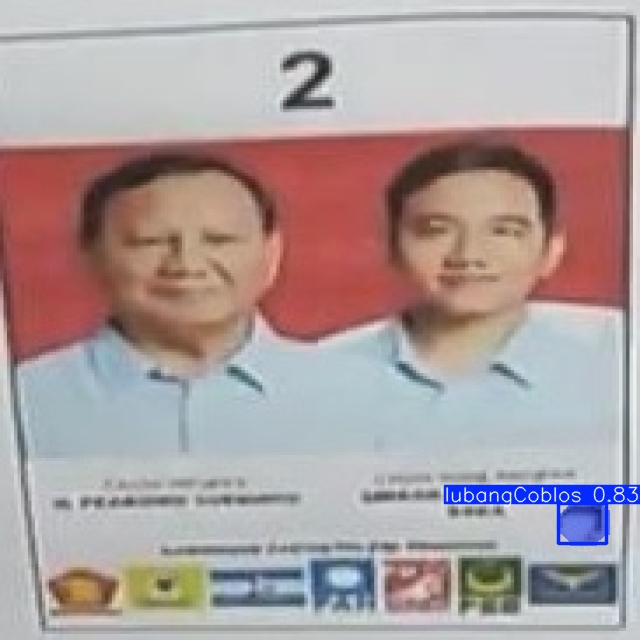

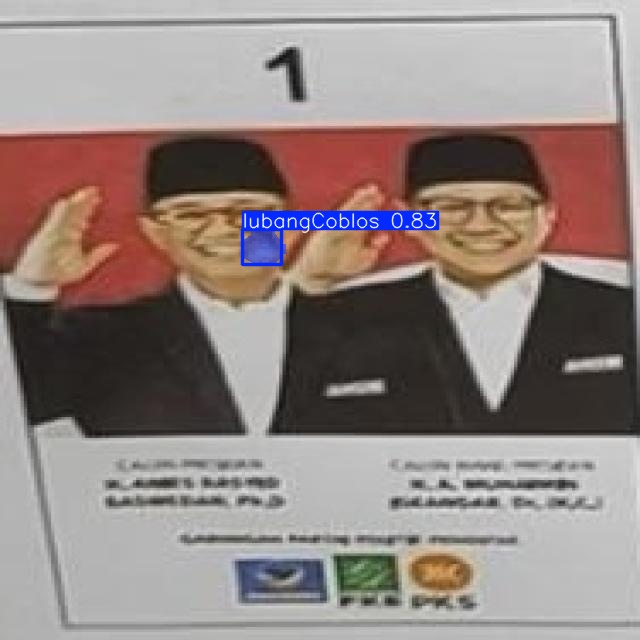

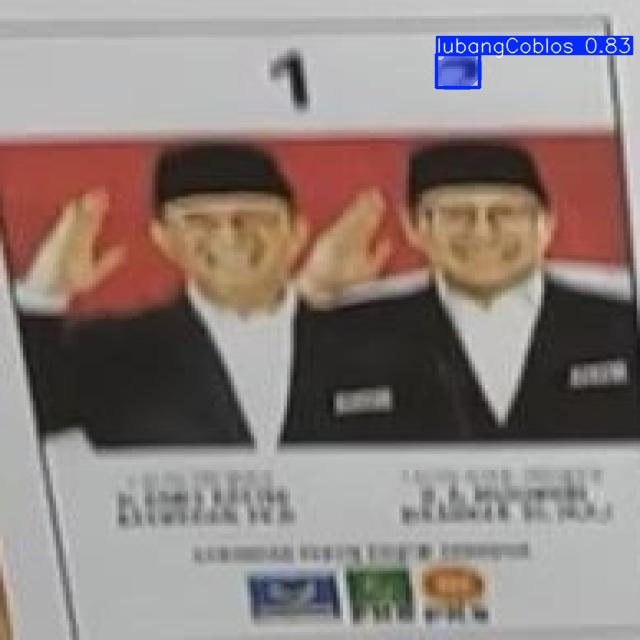

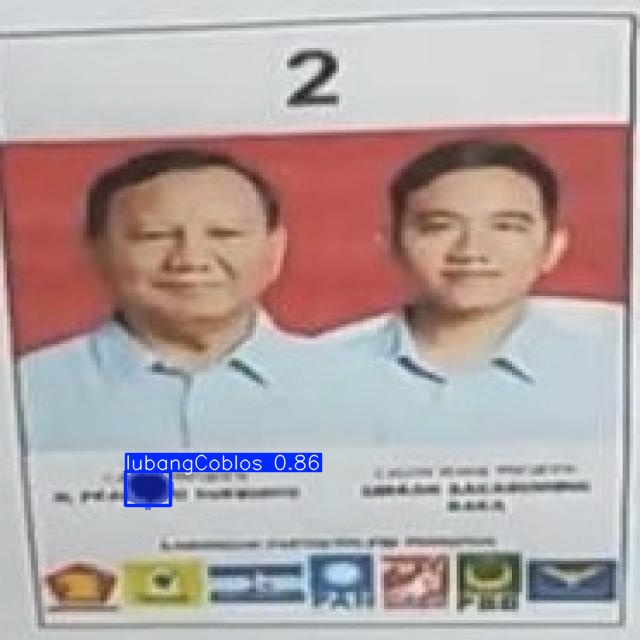

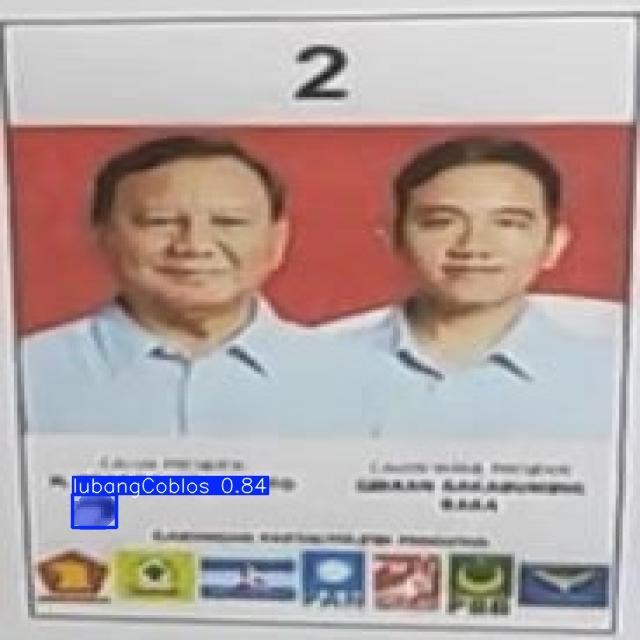

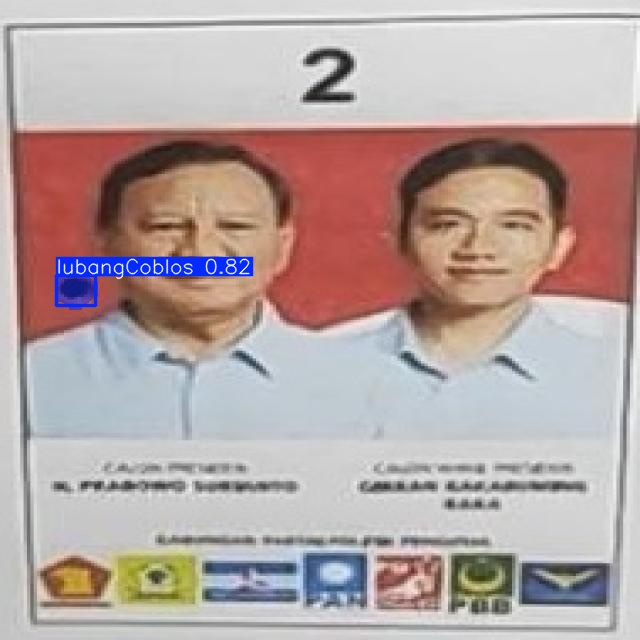

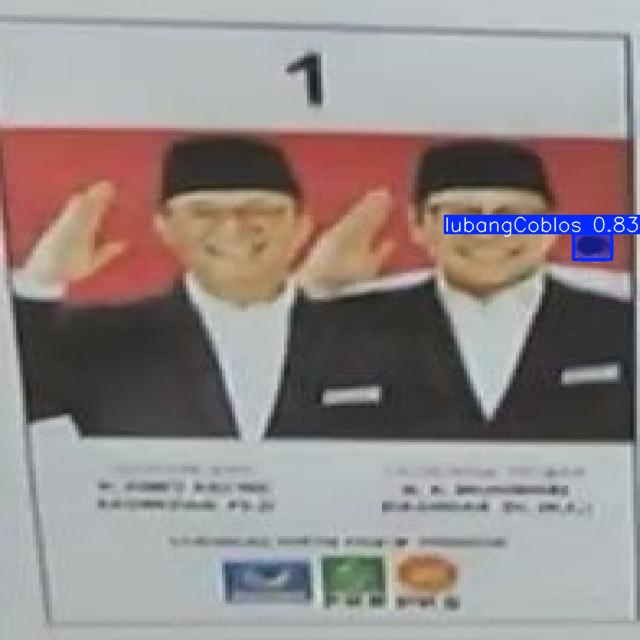

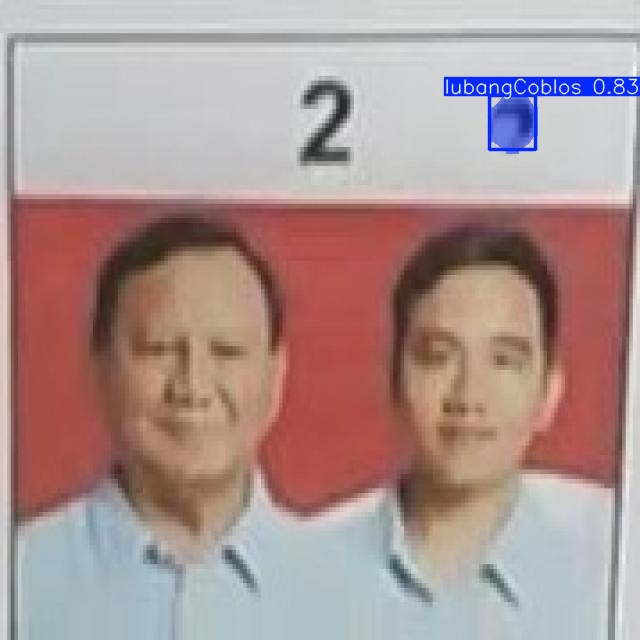

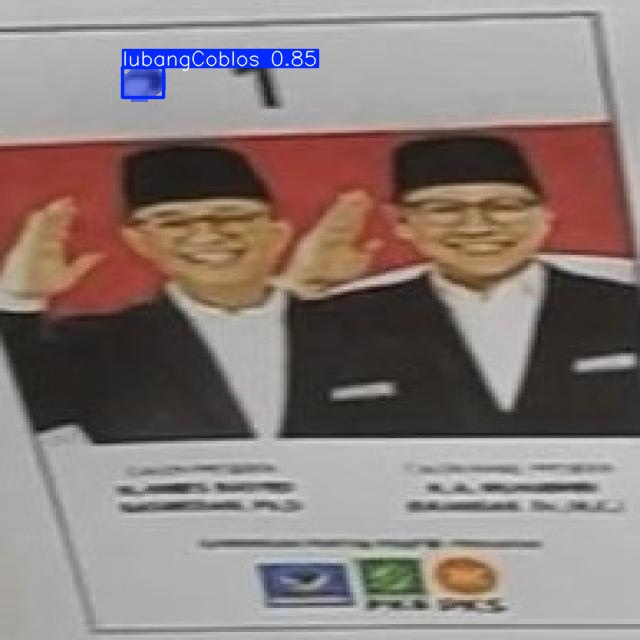

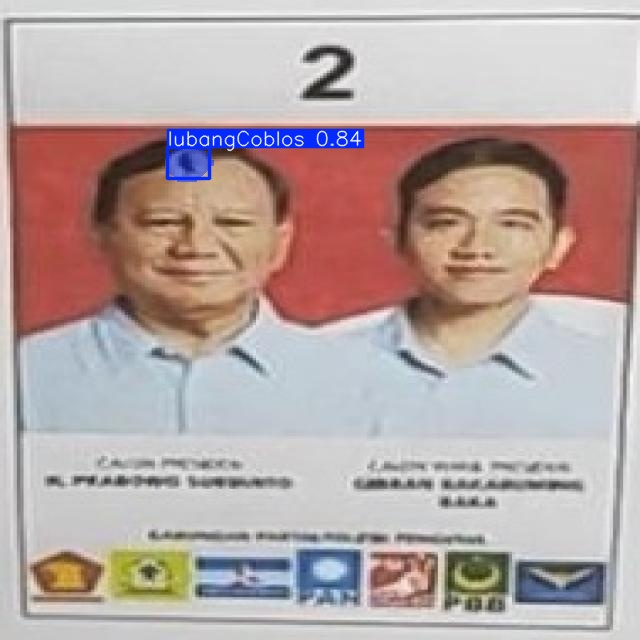

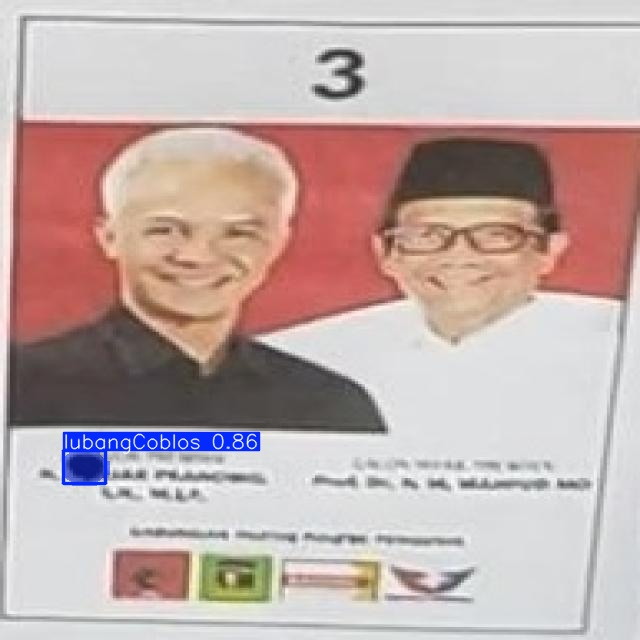

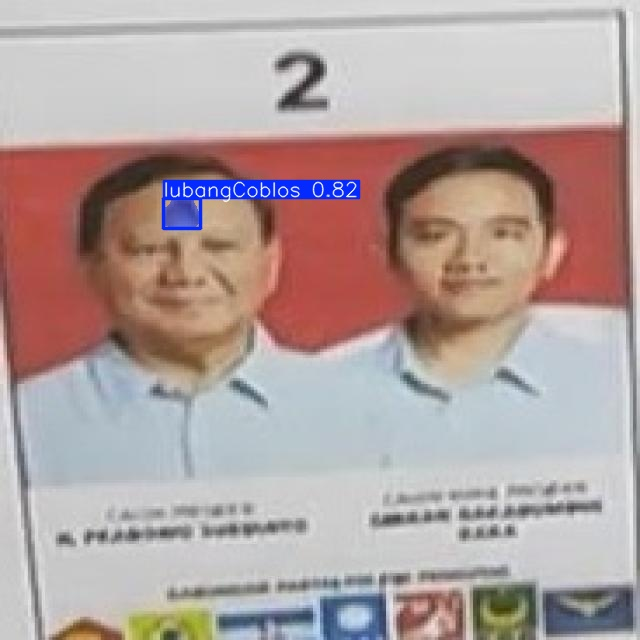

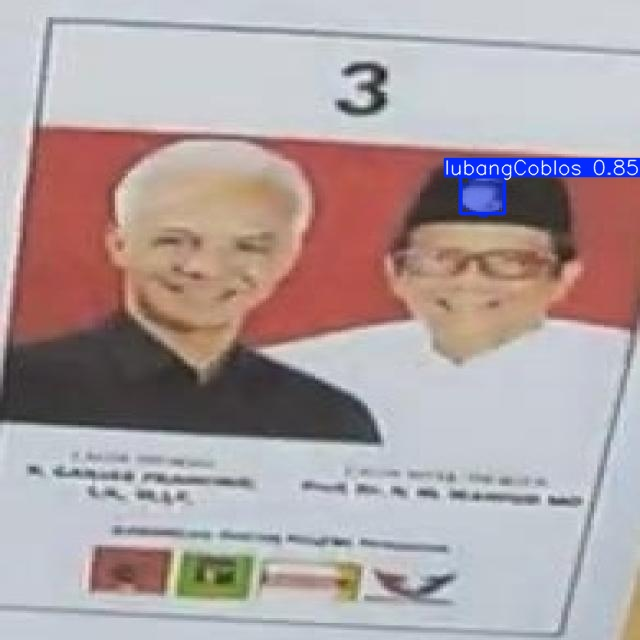

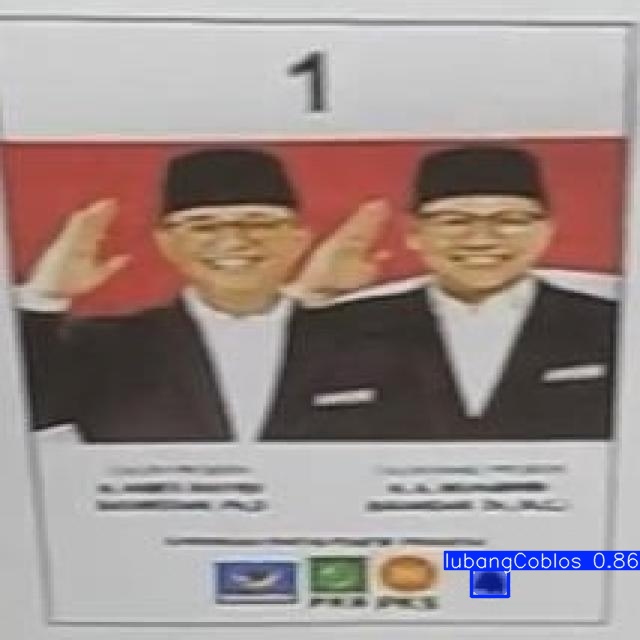

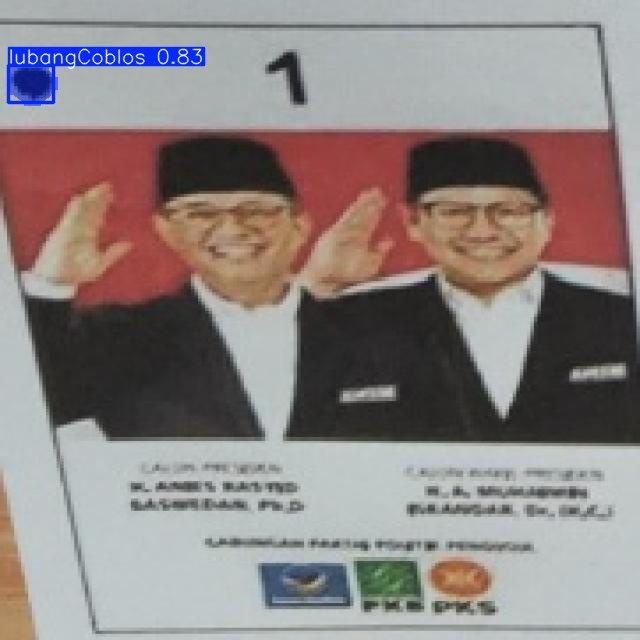

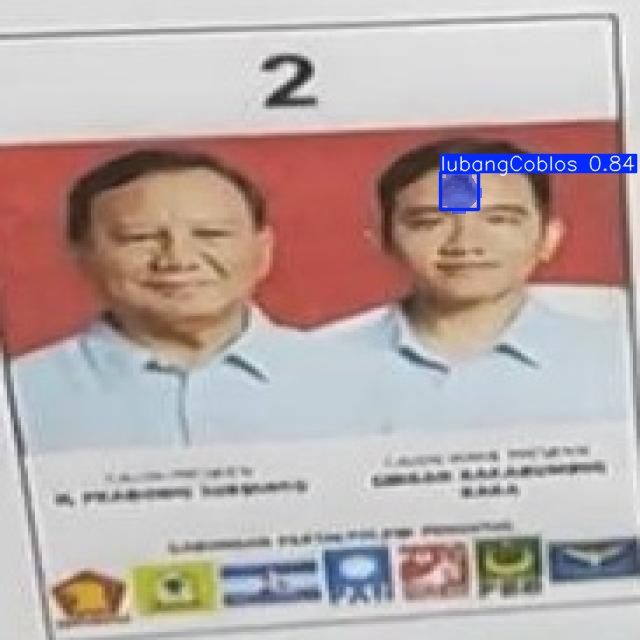

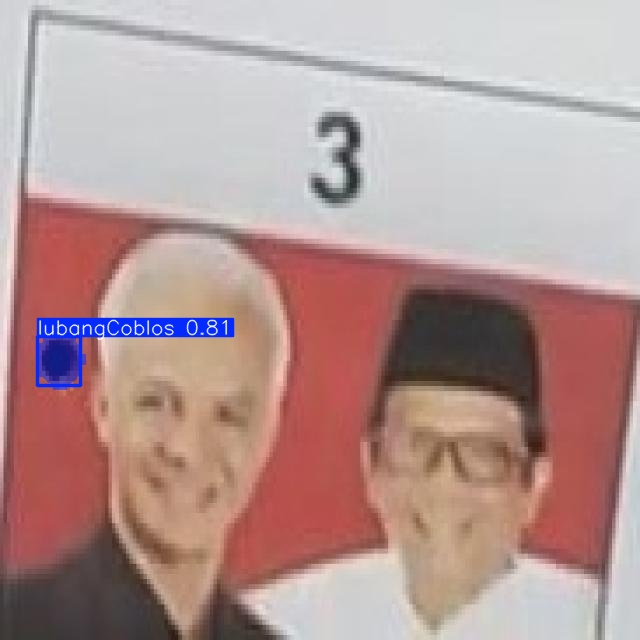

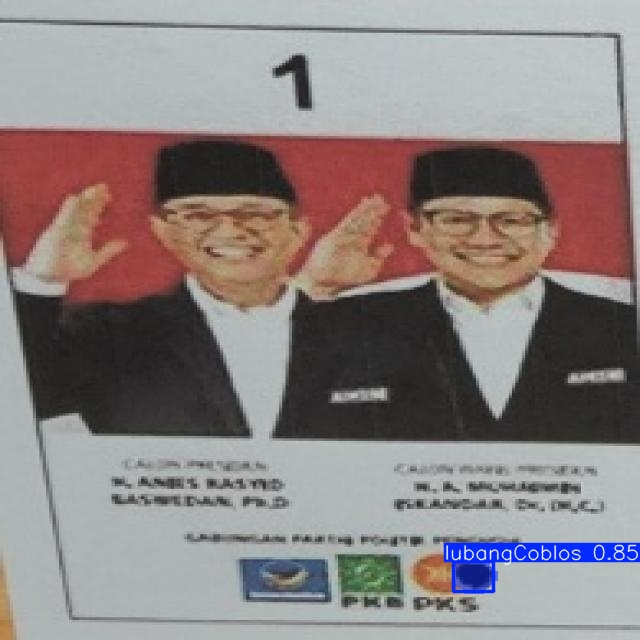

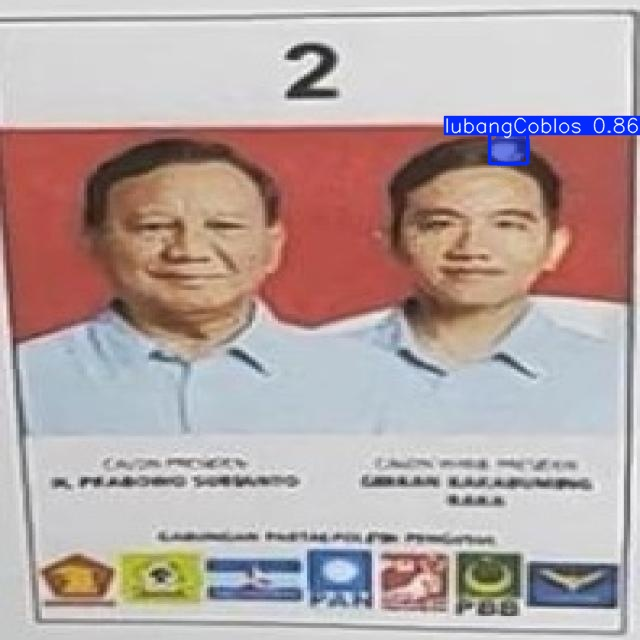

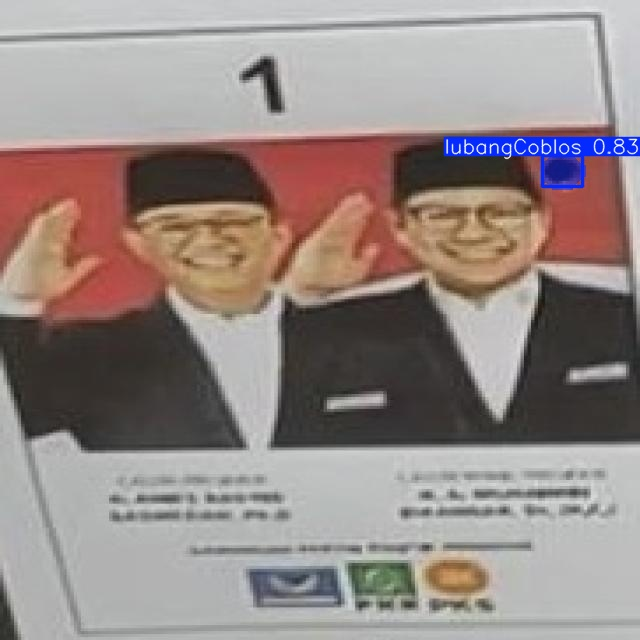

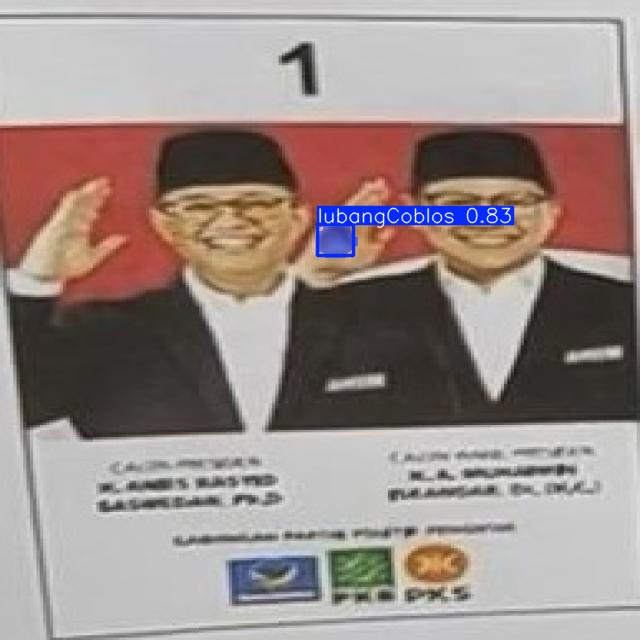

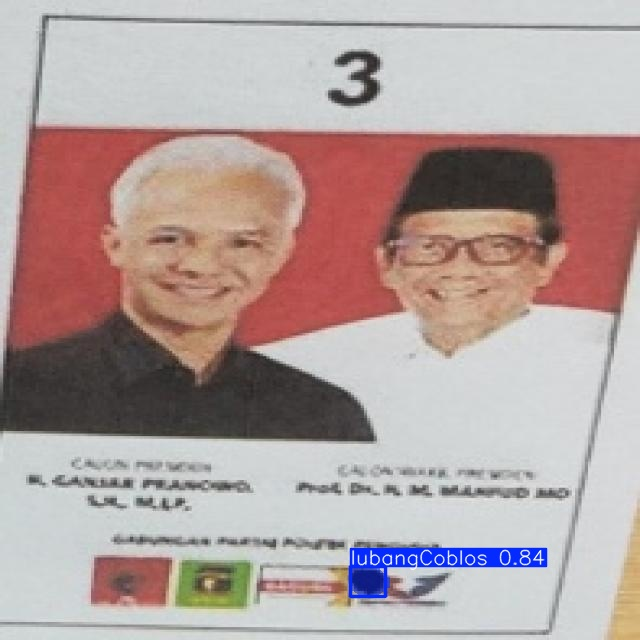

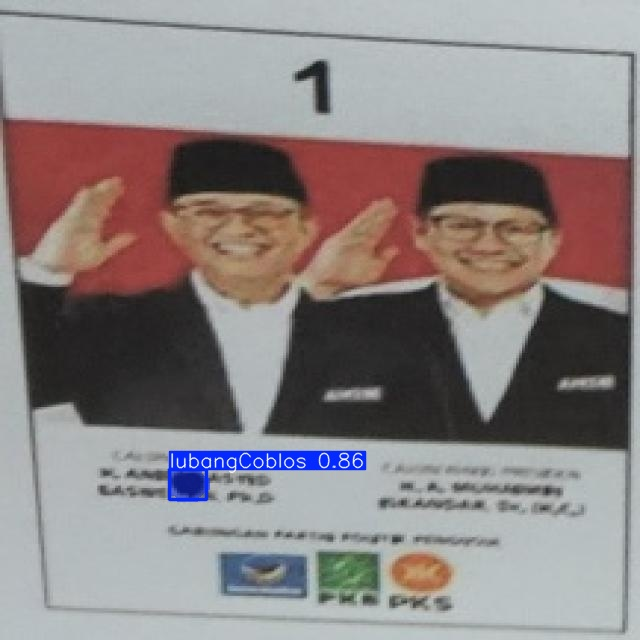

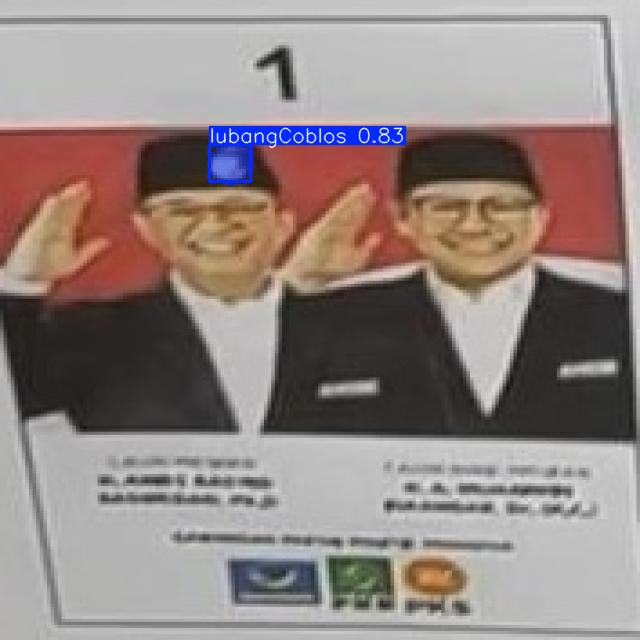

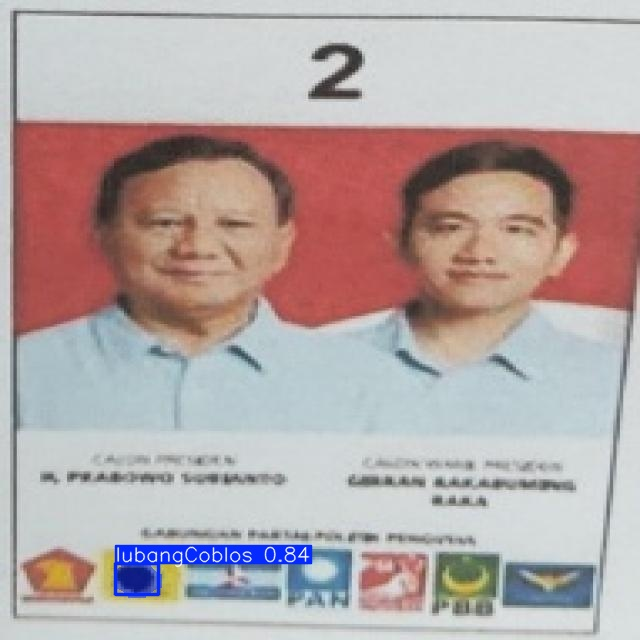

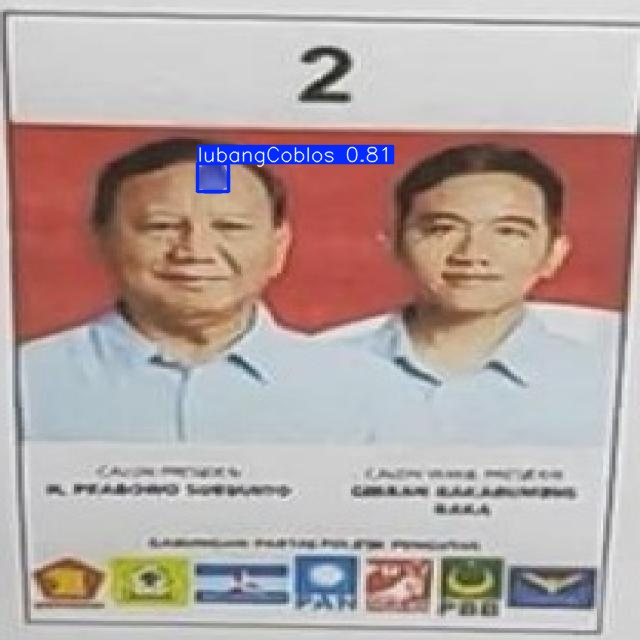

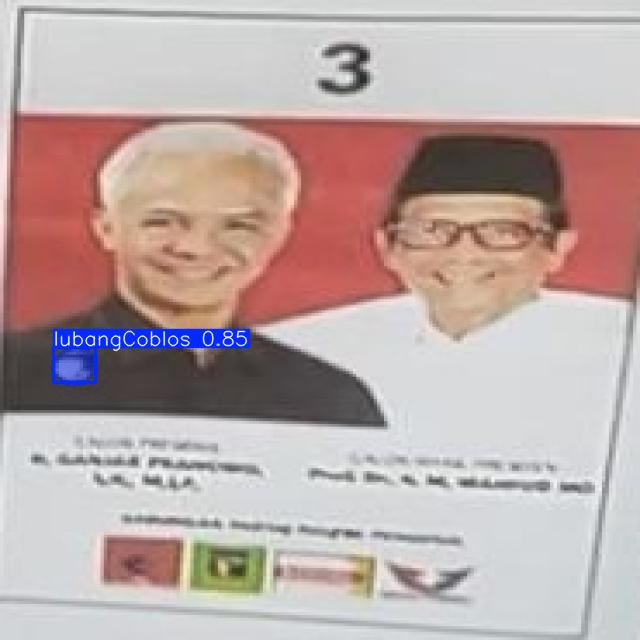

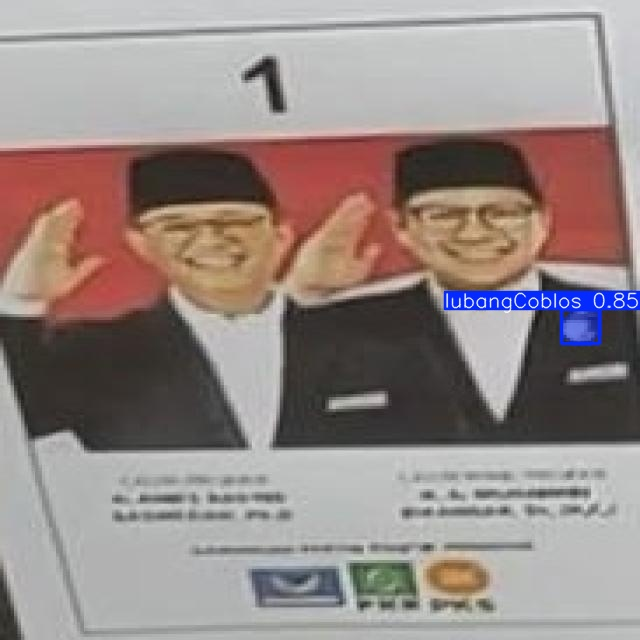

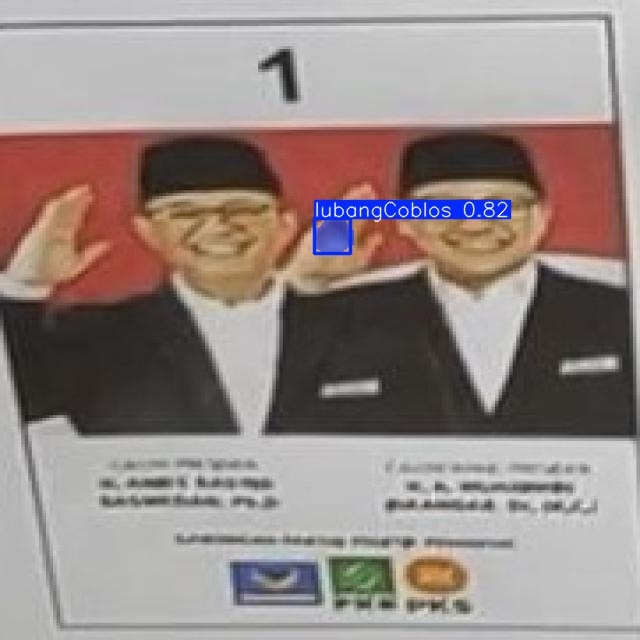

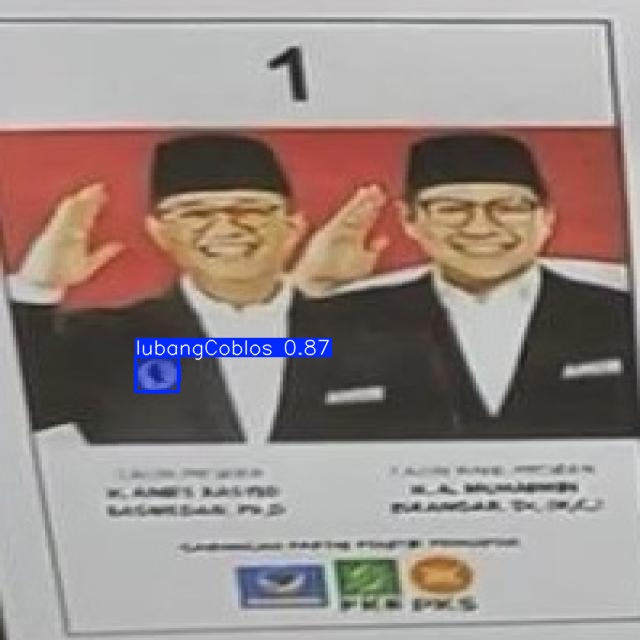

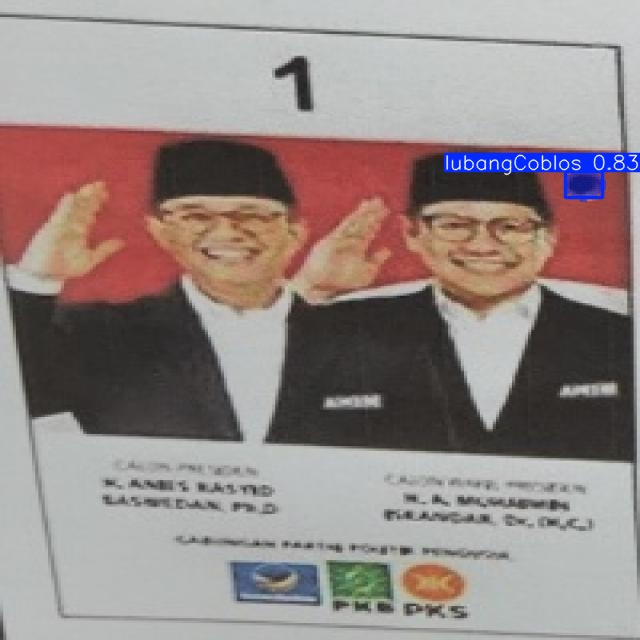

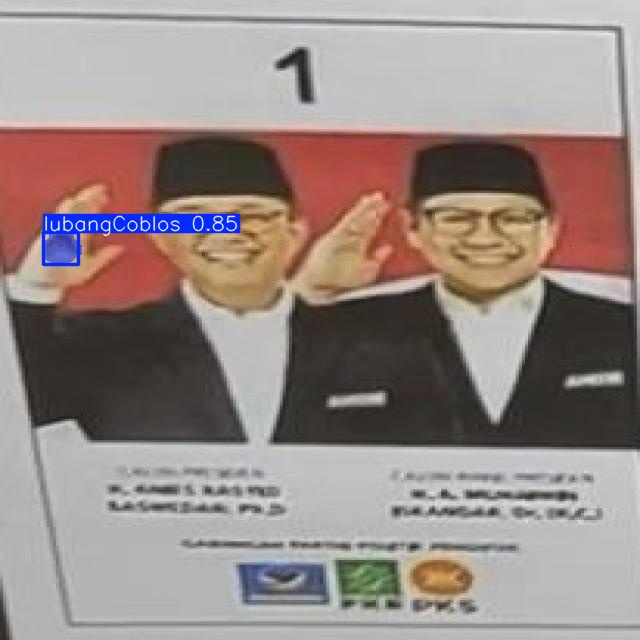

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/segment/Box/*.jpg')[:40]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
import shutil

# Membuat file zip dari folder 'runs'
shutil.make_archive('SkripsiYolo11seg_100epcAug', 'zip', 'runs')

'/content/SkripsiYolo11seg_100epcAug.zip'